In [1]:
import tensorflow as tf
from tensorflow import keras
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from pandas import read_excel
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.layers import Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from sklearn.preprocessing import RobustScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


# Prior libraries
import pandas as pd
import numpy as np
import os
import string

# To Get Combinatiobs
import itertools

# Datetime Libraries
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import calendar
import time

# Trend Seasonality
from statsmodels.tsa.seasonal import STL

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# SAS Connection Library
import swat

# In Order To Read Config File
import json

# Model Preprocess Librarires
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning Algorithm Libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Other Libraries
import math
import logging
from tqdm import tqdm

import multiprocess as mp
from functools import partial

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max.columns", 100)
pd.set_option("display.max.rows", 100)

C:\Users\tunahan.aktas\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


In [2]:
f = open("../config_lstm.json", "r")
params_ = json.loads(f.read())

---

# Read Files

In [3]:
start_all_process = datetime.now()

In [4]:
start_time = datetime.now()

In [5]:
# List of Excel Files
pas_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["pasifik_satis_path"]) if doc_.startswith("Siparişe_göre_Sales_History")])
hor_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["horizon_satis_path"]) if doc_.startswith("Horizon_Saha_")])
btt_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["btt_satis_path"]) if doc_.startswith("Demand Sensing Sales History") or doc_.startswith("Demand_Sensing_Sales_")])

saha_aktivite_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["horizon_aktivite_path"]) if doc_.startswith("Demand_Sensing_Saha_Aktivit") or doc_.startswith("Demand Sensing Saha Aktivit")])
pasifik_aktivite_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["pasifik_aktivite_path"]) if doc_.startswith("Pasifik Aktivite Datası")])

portfoy_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["portfoy_path"]) if doc_.startswith("Portföy")])
eslenik_kod_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["eslenik_kod_path"]) if doc_.startswith("Ürün Eşlenik kodlar")])
kapsam_listeli = sorted([doc_ for doc_ in os.listdir(params_["path"]["kapsam_path"]) if doc_.startswith("Listeli Ürün")])
pas_siparis_lst = sorted([doc_ for doc_ in os.listdir(params_["path"]["pasifik_siparis_path"]) if doc_.startswith("Siparişe_göre_Sales_History")])

In [6]:
end_time = datetime.now()
print('Dosya Listelerini Okuma İşlemi: {}'.format(end_time - start_time))

Dosya Listelerini Okuma İşlemi: 0:00:00.241192


---
# Read Data
---

In [7]:
chng_cols_beginning = {'Year': 'Yıl', 'Quarter': 'Çeyrek', 'Month': 'Ay', 
                       'Company Code': 'Şirket Kodu', 'Main Category Name': 'Ana Kategori Adı', 
                       'Category Name': 'Kategori Adı', 'Brand Name': 'Marka Adı', 'Product Code': 'Ürün Kodu', 
                       'Product Name': 'Ürün Adı', "Ürün Adı (Mobis)": 'Ürün Adı'}

In [8]:
def read_pas(paths_pas, new_col_names, loop_list):
    import pandas as pd
    print("Okumaya başladı.", loop_list)
    new_df = pd.read_excel(paths_pas+loop_list, sheet_name="Ürün Bazlı", usecols="B:O").rename(columns=new_col_names)
    print("Okuma bitti ---->", loop_list)
    return new_df

In [9]:
def read_hor(paths_hor, new_col_names, loop_list):
    import pandas as pd
    print("Okumaya başladı.", loop_list)
    new_df = pd.read_excel(paths_hor+loop_list, skiprows=1, sheet_name="Horizon Saha Satış", usecols="B:L").rename(columns=new_col_names)
    print("Okuma bitti ---->", loop_list)
    return new_df

In [10]:
def read_btt(paths_btt, new_col_names, loop_list):
    import pandas as pd
    print("Okumaya başladı.", loop_list)
    new_df = pd.read_excel(paths_btt+loop_list, skiprows=1, sheet_name="BTT SAP Satış", usecols="B:N").rename(columns=new_col_names)
    print("Okuma bitti ---->", loop_list)
    return new_df

In [11]:
start_time = datetime.now()

In [12]:
pasifik_df_all = []
horizon_saha_df_all = []
btt_df_all = []

if __name__ == "__main__":
    mp.freeze_support()
    available_cpu = mp.cpu_count() - 1
    
    paths_pas = params_["path"]["pasifik_satis_path"]
    paths_hor = params_["path"]["horizon_satis_path"]
    paths_btt = params_["path"]["btt_satis_path"]

    new_col_names = chng_cols_beginning

    loop_pas = pas_lst
    loop_hor = hor_lst
    loop_btt = btt_lst
    
    func_pas = partial(read_pas, paths_pas, new_col_names)
    func_hor = partial(read_hor, paths_hor, new_col_names)
    func_btt = partial(read_btt, paths_btt, new_col_names)
    
    with mp.Pool(available_cpu) as p:
        pasifik_df_all.append(p.map(func_pas, loop_pas))
    with mp.Pool(available_cpu) as p:
        horizon_saha_df_all.append(p.map(func_hor, loop_hor))
    with mp.Pool(available_cpu) as p:
        btt_df_all.append(p.map(func_btt, loop_btt))

In [13]:
end_time = datetime.now()
print('Dataların yüklenmesi: {}'.format(end_time - start_time))

Dataların yüklenmesi: 0:03:33.866785


In [14]:
pasifik_df_all = pd.concat(pasifik_df_all[0], ignore_index=True)
horizon_saha_df_all = pd.concat(horizon_saha_df_all[0], ignore_index=True)
btt_df_all = pd.concat(btt_df_all[0], ignore_index=True)

# Sadece Gerekli Sütunlar Tutuluyor

In [15]:
pasifik_df_all.drop(columns=["Organizasyon Kodu", "Grup Kodu.", "Pladis-Non Pladis"], axis=1, inplace=True)
horizon_saha_df_all.drop(columns=["Çeyrek"], axis=1, inplace=True)
btt_df_all.drop(columns=["Çeyrek", "Şirket Kodu"], axis=1, inplace=True)

btt_df_all["Grup Adı"] = "BTT"
pasifik_df_all.rename(columns={"Ana Kategori": "Ana Kategori Adı", "Kategori": "Kategori Adı", "Ürün Adı (Orjinal)": "Ürün Adı", "Sipariş Miktarı(Dönüş. Koli)": "Koli", 
                               "Sipariş Brüt Tutar": "KG", "Sipariş Brüt KG": "TL"}, inplace=True)

horizon_saha_df_all.rename(columns={"Horizon müşteri grup": "Grup Adı", "Ürün Adı (Orjinal)": "Ürün Adı"}, inplace=True)

In [16]:
horizon_saha_df_all.dropna(inplace=True, how="any")
horizon_saha_df_all.reset_index(inplace=True)

## Pasifik Kısmı

In [17]:
col_order = ['Yıl', 'Ay', 'Grup Adı', 'Ana Kategori Adı', 'Kategori Adı', 'Marka Adı', 'Ürün Kodu', 'Ürün Adı', 'Koli', 'KG', 'TL']
ltrs = list(string.ascii_letters) # Alfabede bulunan tüm harfleri tutan liste. Bunu, koli içi adet dataframe'deki harf içeren ürün kodlarını elemek için tutuyoruz.

horizon_saha_df_all["Kategori Adı"] = np.nan

pasifik_df_all = pasifik_df_all[col_order]
horizon_saha_df_all = horizon_saha_df_all[col_order]
btt_df_all = btt_df_all[col_order]

params_["time_info_for_debugging"]["ay"] = 9

In [18]:
def read_aktivite_detay(paths_detay, loop_list):
    import pandas as pd
    print("Okumaya başladı.", loop_list)
    new_df = pd.read_excel(paths_detay+loop_list, skiprows=1, sheet_name="Ürün Detay", usecols="B:M")
    print("Okuma bitti ---->", loop_list)
    return new_df

In [19]:
def read_aktivite_cat(paths_cat, loop_list):
    import pandas as pd
    print("Okumaya başladı.", loop_list)
    new_df = pd.read_excel(paths_cat+loop_list, skiprows=1, sheet_name="Kategori", usecols="B:I")
    print("Okuma bitti ---->", loop_list)
    return new_df

In [20]:
start_time = datetime.now()

In [21]:
saha_aktivite_detay = []
saha_aktivite_cat = []

if __name__ == "__main__":
    mp.freeze_support()
    available_cpu = mp.cpu_count() - 1
    
    paths_detay = params_["path"]["horizon_aktivite_path"]
    paths_cat = params_["path"]["horizon_aktivite_path"]

    loop_detay = saha_aktivite_lst
    loop_cat = saha_aktivite_lst
    
    func_detay = partial(read_aktivite_detay, paths_detay)
    func_cat = partial(read_aktivite_cat, paths_cat)
    
    with mp.Pool(available_cpu) as p:
        saha_aktivite_detay.append(p.map(func_detay, loop_detay))
    with mp.Pool(available_cpu) as p:
        saha_aktivite_cat.append(p.map(func_cat, loop_cat))

In [22]:
end_time = datetime.now()
print('Dataların yüklenmesi: {}'.format(end_time - start_time))

Dataların yüklenmesi: 0:00:59.319690


In [23]:
saha_aktivite_detay = pd.concat(saha_aktivite_detay[0], ignore_index=True)
saha_aktivite_cat = pd.concat(saha_aktivite_cat[0], ignore_index=True)

In [24]:
saha_aktivite_detay.drop_duplicates(subset=["Yıl", "Ay", "Saha Müşteri Grup", "Ürün Kodu"], keep="first", ignore_index=True, inplace=True)

In [25]:
# Read Pasifik Aktiviteleri
pasifik_aktivite_df = pd.read_excel(params_["path"]["pasifik_aktivite_path"]+pasifik_aktivite_lst[0])
pasifik_aktivite_df.drop_duplicates(subset=["Yıl", "Ay", "Müşteri Grup", "Ürün Kodu"], keep="first", ignore_index=True, inplace=True)

In [26]:
# Read Fiyat Listesi
fiyat_lst_pasifik = pd.read_excel(params_["path"]["fiyat_listesi_path"]+params_["files"]["pasifik_fiyat_file"])
fiyat_lst_horizon = pd.read_excel(params_["path"]["fiyat_listesi_path"]+params_["files"]["horizon_fiyat_file"])

In [27]:
# Read Portföy
pasifik_portfoy_df = pd.read_excel(params_["path"]["portfoy_path"]+portfoy_lst[0], sheet_name="Pasifik Portföy", skiprows=3, usecols="D:H")
btt_portfoy_df = pd.read_excel(params_["path"]["portfoy_path"]+portfoy_lst[0], sheet_name="BTT Portföy", skiprows=2, usecols="D:H")
horizon_portfoy_df = pd.read_excel(params_["path"]["portfoy_path"]+portfoy_lst[0], sheet_name="Horizon Portföy", skiprows=2, usecols="E:I")

In [28]:
# Read Eşlenik Kodları
eslenik_kod_df = pd.read_excel(params_["path"]["eslenik_kod_path"]+eslenik_kod_lst[0])

In [29]:
# Read Calender
calender_df = pd.read_excel(params_["path"]["calender_path"]+params_["files"]["calender_file"])

In [30]:
eslenik_kod_df["En Güncel Kod"] = eslenik_kod_df["En Güncel Kod"].apply(lambda x: int(x) if x not in ['delist ', "delist", "Delist"] else x.replace(" ", ""))

In [31]:
a101_kapsam = pd.read_excel(params_["path"]["kapsam_path"]+kapsam_listeli[0], sheet_name="A101 Portföy")
sok_kapsam = pd.read_excel(params_["path"]["kapsam_path"]+kapsam_listeli[0], sheet_name="Şok Portföy")
bim_kapsam = pd.read_excel(params_["path"]["kapsam_path"]+kapsam_listeli[0], sheet_name="Bim Portföy")

a101_kapsam["grup_adi"] = "A101"
sok_kapsam["grup_adi"] = "ŞOK"
bim_kapsam["grup_adi"] = "BİM"

kapsam_all = pd.concat([a101_kapsam, sok_kapsam, bim_kapsam], axis=0, ignore_index=True)

In [32]:
# Read Koli Birim Ağırlıkları
koli_birim_agirlik = pd.read_excel(params_["files"]["koli_agirlik_birim_file"])
koli_birim_agirlik_pas = pd.read_excel(params_["files"]["koli_agirlik_birim_file"])

In [33]:
koli_birim_agirlik.rename(columns={"Malzeme": "en_guncel_kod", 
                                   "Malzeme Açıklaması": "urun_adi", 
                                   "Ana Kategori": "ana_kategori_adi",
                                   "Kategori": "kategori_adi",
                                   "Alt Kategori": "alt_kategori_adi",
                                   "Detay Kategori": "detay_kategori_adi",
                                   "Marka": "marka_adi", "Marka Açıklaması": "marka_aciklamasi",
                                   "Net Ağırlık": "kg"}, inplace=True)

koli_birim_agirlik_pas.rename(columns={"Malzeme": "en_guncel_kod", 
                                   "Malzeme Açıklaması": "urun_adi", 
                                   "Ana Kategori": "ana_kategori_adi",
                                   "Kategori": "kategori_adi",
                                   "Alt Kategori": "alt_kategori_adi",
                                   "Detay Kategori": "detay_kategori_adi",
                                   "Marka": "marka_adi", "Marka Açıklaması": "marka_aciklamasi",
                                   "Net Ağırlık": "kg"}, inplace=True)

In [34]:
koli_birim_agirlik_pas["kanal"] = "pasifik"
koli_birim_agirlik_hor = koli_birim_agirlik.copy()
koli_birim_agirlik_btt = koli_birim_agirlik.copy()
koli_birim_agirlik_hor["kanal"] = "horizon"
koli_birim_agirlik_btt["kanal"] = "btt"

In [35]:
koli_birim_agirlik = pd.concat([koli_birim_agirlik_pas, koli_birim_agirlik_hor, koli_birim_agirlik_btt], axis=0, ignore_index=True)

In [36]:
end_time = datetime.now()
print('Diğer dataların Jupytere yüklenme süresi: {}'.format(end_time - start_time))

Diğer dataların Jupytere yüklenme süresi: 0:01:13.138691


---
# Pasifik 2016 aktivite verileri olmadığı için 2016 Sales dataları çıkartıldı.

In [37]:
pasifik_df_all = pasifik_df_all[pasifik_df_all["Yıl"] != 2016].reset_index(drop=True)

In [38]:
horizon_saha_df_all["Yıl"] = horizon_saha_df_all["Yıl"].astype(int)
horizon_saha_df_all["Ay"] = horizon_saha_df_all["Ay"].astype(int)

---
# Sales Datası İçin Ürün Kod Eşleme
---

## Join

In [39]:
pasifik_df_all = pd.merge(pasifik_df_all, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
horizon_saha_df_all = pd.merge(horizon_saha_df_all, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
btt_df_all = pd.merge(btt_df_all, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")

## Ürün Eşleme Kodları dosyasında yer almayan kodlar için mevcut ürün kodları verildi.

In [40]:
empty_ = pasifik_df_all[pd.isnull(pasifik_df_all["En Güncel Kod"])].reset_index(drop=True)
full_ = pasifik_df_all[~pd.isnull(pasifik_df_all["En Güncel Kod"])].reset_index(drop=True)
empty_["En Güncel Kod"] = empty_["Ürün Kodu"]
pasifik_df_all = pd.concat([empty_, full_], axis=0, ignore_index=True)
pasifik_df_all = pasifik_df_all.sort_values(pasifik_df_all.columns.to_list()).reset_index(drop=True)

empty_ = btt_df_all[pd.isnull(btt_df_all["En Güncel Kod"])].reset_index(drop=True)
full_ = btt_df_all[~pd.isnull(btt_df_all["En Güncel Kod"])].reset_index(drop=True)
empty_["En Güncel Kod"] = empty_["Ürün Kodu"]
btt_df_all = pd.concat([empty_, full_], axis=0, ignore_index=True)
btt_df_all = btt_df_all.sort_values(btt_df_all.columns.to_list()).reset_index(drop=True)

empty_ = horizon_saha_df_all[pd.isnull(horizon_saha_df_all["En Güncel Kod"])].reset_index(drop=True)
full_ = horizon_saha_df_all[~pd.isnull(horizon_saha_df_all["En Güncel Kod"])].reset_index(drop=True)
empty_["En Güncel Kod"] = empty_["Ürün Kodu"]
horizon_saha_df_all = pd.concat([empty_, full_], axis=0, ignore_index=True)
horizon_saha_df_all = horizon_saha_df_all.sort_values(horizon_saha_df_all.columns.to_list()).reset_index(drop=True)

## Adet adında yeni bir kolon oluşturuldu. Koli Sayısı 100'den az olanlara 0 yazıyoruz

In [41]:
pasifik_df_all["Koli"] = pasifik_df_all["Koli"] = np.where(pasifik_df_all["Koli"] < 100, 0, pasifik_df_all["Koli"])
btt_df_all["Koli"] = btt_df_all["Koli"] = np.where(btt_df_all["Koli"] < 100, 0, btt_df_all["Koli"])
horizon_saha_df_all["Koli"] = horizon_saha_df_all["Koli"] = np.where(horizon_saha_df_all["Koli"] < 100, 0, horizon_saha_df_all["Koli"])

## Delist olan ürünler veriden çıkartıldı.

In [42]:
pasifik_df_all = pasifik_df_all[pasifik_df_all["En Güncel Kod"] != "delist"].reset_index(drop=True)
btt_df_all = btt_df_all[btt_df_all["En Güncel Kod"] != "delist"].reset_index(drop=True)
horizon_saha_df_all = horizon_saha_df_all[horizon_saha_df_all["En Güncel Kod"] != "delist"].reset_index(drop=True)

## Aynı yıl, ay, grup adı, ana kategori adı, kategori adı, marka adı ve SKU kodundaki ürünler için toplam alındı. Sadece Koli İçi Adet için maksimum olan alındı.

---

# Marka adı dahil değil groupby'a
---

In [43]:
dct_to_sum = {"Koli": "sum", "KG": "sum", "TL": "sum"}

pasifik_df_all2 = pasifik_df_all.groupby(["Yıl", "Ay", "Grup Adı", "Ana Kategori Adı", "Kategori Adı", "En Güncel Kod"]).agg(dct_to_sum).reset_index()
btt_df_all2 = btt_df_all.groupby(["Yıl", "Ay", "Grup Adı", "Ana Kategori Adı", "Kategori Adı", "En Güncel Kod"]).agg(dct_to_sum).reset_index()
horizon_saha_df_all2 = horizon_saha_df_all.groupby(["Yıl", "Ay", "Grup Adı", "Ana Kategori Adı", "En Güncel Kod"]).agg(dct_to_sum).reset_index()

In [44]:
pasifik_df_all2["Date"] = pasifik_df_all2["Yıl"].astype(str) + "-" +  pasifik_df_all2["Ay"].astype(str) + "-01"
btt_df_all2["Date"] = btt_df_all2["Yıl"].astype(int).astype(str) + "-" +  btt_df_all2["Ay"].astype(int).astype(str) + "-01"
horizon_saha_df_all2["Date"] = horizon_saha_df_all2["Yıl"].astype(int).astype(str) + "-" +  horizon_saha_df_all2["Ay"].astype(int).astype(str) + "-01"

pasifik_df_all2["Date"] = pd.to_datetime(pasifik_df_all2["Date"], format="%Y-%m-%d", errors="coerce")
btt_df_all2["Date"] = pd.to_datetime(btt_df_all2["Date"], format="%Y-%m-%d", errors="coerce")
horizon_saha_df_all2["Date"] = pd.to_datetime(horizon_saha_df_all2["Date"], format="%Y-%m-%d", errors="coerce")

In [45]:
pasifik_df_all2.shape, horizon_saha_df_all2.shape, btt_df_all2.shape

((43711, 10), (266027, 9), (14634, 10))

## Horizon ve Pasifikte bulunan "Diğer"'lerin yanlarına "_" ile Diğer_Pasifik, Diğer_Horizon yazıldı.

In [46]:
pasifik_df_all2["Grup Adı"] = pasifik_df_all2["Grup Adı"].apply(lambda x: "Diğer_Pasifik" if x == "Diğer" else x)
horizon_saha_df_all2["Grup Adı"] = horizon_saha_df_all2["Grup Adı"].apply(lambda x: "Diğer_Horizon" if x == "Diğer" else x)

In [47]:
df_all2 = pd.concat([pasifik_df_all2, horizon_saha_df_all2, btt_df_all2], ignore_index=True)

In [48]:
if params_["time_info_for_debugging"]["ay"] == 12:
    ay_threshold = params_["time_info_for_debugging"]["ay"] = 1
    yil_threshold = params_["time_info_for_debugging"]["yil"] + 1
else:
    ay_threshold = params_["time_info_for_debugging"]["ay"] + 1
    yil_threshold = params_["time_info_for_debugging"]["yil"]

---
# Pasifik Filling Missing Dates
---

In [49]:
def fill_missing_dates(df__, df_unique_list):
    df_all_filled = []
    for idx in df_unique_list.index:
        tmp_df = df__[(df__["Grup Adı"] == df_unique_list["Grup Adı"][idx]) & (df__["En Güncel Kod"] == df_unique_list["En Güncel Kod"][idx])]
        time_interval = []
        dt = tmp_df.Date.min()
        while dt <= datetime(params_["time_info_for_debugging"]["yil"], params_["time_info_for_debugging"]["ay"], 1):
            time_interval.append(dt)
            dt += relativedelta(months=1)
        date_to_add = [i for i in time_interval if i not in tmp_df.Date.unique()]
        if len(date_to_add) > 0:
            add_df = pd.concat([pd.DataFrame(tmp_df.iloc[0]).T]*len(date_to_add))
            add_df["Koli"], add_df["KG"], add_df["TL"] = 0, 0, 0
            add_df["Date"] = date_to_add
            add_df["Yıl"] = add_df["Date"].dt.year
            add_df["Ay"] = add_df["Date"].dt.month
            df_all_filled.append(pd.concat([tmp_df, add_df], ignore_index=True))
        else: 
            df_all_filled.append(tmp_df)
    return pd.concat(df_all_filled, ignore_index=True)

In [50]:
start_time = datetime.now()

In [51]:
unique_list = pasifik_df_all2.drop_duplicates(subset=["Grup Adı", "En Güncel Kod"], ignore_index=True)[["Grup Adı", "En Güncel Kod"]]
pasifik_df_all2 = fill_missing_dates(pasifik_df_all2, unique_list)

In [52]:
end_time = datetime.now()
print('Pasifik missing value düzenlenmesi süresi: {}'.format(end_time - start_time))

Pasifik missing value düzenlenmesi süresi: 0:01:23.918874


---
# Horizon Filling Missing Values
---

In [53]:
start_time = datetime.now()

In [54]:
unique_list = horizon_saha_df_all2.drop_duplicates(subset=["Grup Adı", "En Güncel Kod"], ignore_index=True)[["Grup Adı", "En Güncel Kod"]]
horizon_saha_df_all2 = fill_missing_dates(horizon_saha_df_all2, unique_list)

In [55]:
end_time = datetime.now()
print('Horizon missing value düzenlenmesi süresi: {}'.format(end_time - start_time))

Horizon missing value düzenlenmesi süresi: 0:11:04.531599


---
# BTT Filling Missing Values
---

In [56]:
start_time = datetime.now()

In [57]:
unique_list = btt_df_all2.drop_duplicates(subset=["Grup Adı", "En Güncel Kod"], ignore_index=True)[["Grup Adı", "En Güncel Kod"]]
btt_df_all2 = fill_missing_dates(btt_df_all2, unique_list)

In [58]:
end_time = datetime.now()
print('BTT missing value düzenlenmesi süresi: {}'.format(end_time - start_time))

BTT missing value düzenlenmesi süresi: 0:00:06.609003


In [59]:
df_all22 = pd.concat([pasifik_df_all2, horizon_saha_df_all2, btt_df_all2], ignore_index=True)

---

# Aktivite Datası İçin Ürün Kod Eşleme

---

# Pasifik Aktivite

## Left join ile güncel kodlar getirildi. Delist olan ürünler listeden çıkartıldı. "Çeyrek" sütunu silindi. En güncel kod sütunnuda bulunamayan değerler Ürün Kodu sütunundan çekildi.

In [60]:
pasifik_aktivite_df2 = pd.merge(pasifik_aktivite_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
pasifik_aktivite_df2 = pasifik_aktivite_df2[pasifik_aktivite_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
pasifik_aktivite_df2.drop("Çeyrek", inplace=True, axis=1)
pasifik_aktivite_df2['En Güncel Kod'] = pasifik_aktivite_df2['En Güncel Kod'].fillna(pasifik_aktivite_df2['Ürün Kodu'])
pasifik_aktivite_df2.drop(columns="Ürün Kodu", axis=1, inplace=True)

---

# Pasifik Aktivite Ciro - Promosyon Tutarı ve İskonto Tekilleştirme (ORTALAMA ALARAK)

In [61]:
ort_pas = {"Raf Tavsiye Satış Fiyatı": "mean", "İndirimli Raf Satış Fiyatı": "mean", "İndirim %": "mean", "Aktivite Tipi": "first"}
pasifik_aktivite_df3 = pasifik_aktivite_df2.groupby(["En Güncel Kod", "Yıl", "Ay", "Müşteri Grup"]).agg(ort_pas).reset_index()
pasifik_aktivite_df3 = pd.merge(pasifik_aktivite_df3, pasifik_aktivite_df2[["Yıl", "Ay", "Müşteri Grup", "En Güncel Kod", 
                                                                            "Ana Kategori Adı", "Kategori Adı", "Marka Adı"]],
                                how="left", 
                                on=["En Güncel Kod", "Yıl", "Ay", "Müşteri Grup"])

pasifik_aktivite_df3.drop_duplicates(subset=pasifik_aktivite_df3.columns.to_list(), inplace=True)
pasifik_aktivite_df3.reset_index(drop=True, inplace=True)
pasifik_aktivite_df3 = pasifik_aktivite_df3[pasifik_aktivite_df2.drop("Ürün Adı", axis=1).columns.to_list()]

---

# Horizon Aktivite

In [62]:
saha_aktivite_detay2 = pd.merge(saha_aktivite_detay, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], on="Ürün Kodu", how="left")
saha_aktivite_detay2 = saha_aktivite_detay2[saha_aktivite_detay2["En Güncel Kod"] != "delist"].reset_index(drop=True)
saha_aktivite_detay2.drop("Çeyrek", inplace=True, axis=1)
saha_aktivite_detay2['En Güncel Kod'] = saha_aktivite_detay2['En Güncel Kod'].fillna(saha_aktivite_detay2['Ürün Kodu'])
saha_aktivite_detay2.drop(columns="Ürün Kodu", axis=1, inplace=True)
saha_aktivite_detay2["İskonto %"].replace("#DIV/0", np.nan,inplace=True)

# Horizon Aktivite Ciro - Promosyon Tutarı ve İskonto Tekilleştirme (ORTALAMA ALARAK)

In [63]:
ort = {"Ciro (Kull. İade Düş.)": "mean", "Promosyon Tutarı": "mean", "İskonto %": "mean"}
saha_aktivite_detay3 = saha_aktivite_detay2.groupby(["En Güncel Kod", "Yıl", "Ay", "Saha Müşteri Grup"]).agg(ort).reset_index()

saha_aktivite_detay3 = pd.merge(saha_aktivite_detay3, saha_aktivite_detay2[["Yıl", "Ay", "Saha Müşteri Grup", "En Güncel Kod", 
                                                 "Ana Kategori Adı", "Kategori Adı", "Marka Adı"]],
                           how="left", 
                           on=["En Güncel Kod", "Yıl", "Ay", "Saha Müşteri Grup"])

saha_aktivite_detay3.drop_duplicates(subset=saha_aktivite_detay3.columns.to_list(), inplace=True)

In [64]:
saha_aktivite_detay3 = saha_aktivite_detay3[saha_aktivite_detay2.drop("Ürün Adı (Mobis)", axis=1).columns.to_list()].reset_index(drop=True)

In [65]:
saha_aktivite_detay3.rename(columns={"Saha Müşteri Grup": "Grup Adı"}, inplace=True)
saha_aktivite_detay3["Grup Adı"] = saha_aktivite_detay3["Grup Adı"].apply(lambda x: "Diğer_Horizon" if x == "Diğer" else x)

---

# Fiyat Listesi

## Horizon Fiyatları
---

In [66]:
start_time = datetime.now()

In [67]:
fiyat_lst_horizon.drop_duplicates(subset=fiyat_lst_horizon.columns.to_list(), keep="first", ignore_index=True, inplace=True)

In [68]:
try:
    fiyat_lst_horizon["Malzeme"] = fiyat_lst_horizon["Malzeme"].str.replace("-", "")
    fiyat_lst_horizon["Malzeme"] = fiyat_lst_horizon["Malzeme"].astype(int)*1
except:
    fiyat_lst_horizon["Malzeme"] = fiyat_lst_horizon["Malzeme"].astype(int)*1

In [69]:
fiyat_lst_horizon_df = fiyat_lst_horizon.copy()

In [70]:
fiyat_lst_horizon_df["Baslangic_Yıl"] = fiyat_lst_horizon_df["Bşl.tarihi"].apply(lambda x: x.year)
fiyat_lst_horizon_df["Baslangic_Ay"] = fiyat_lst_horizon_df["Bşl.tarihi"].apply(lambda x: x.month)
fiyat_lst_horizon_df["Baslangic_Gun"] = fiyat_lst_horizon_df["Bşl.tarihi"].apply(lambda x: x.day)
fiyat_lst_horizon_df["Gecerlilik_Yıl"] = fiyat_lst_horizon_df["Gçrl.sonu"].apply(lambda x: x.year)
fiyat_lst_horizon_df["Gecerlilik_Ay"] = fiyat_lst_horizon_df["Gçrl.sonu"].apply(lambda x: x.month)
fiyat_lst_horizon_df["Gecerlilik_Gun"] = fiyat_lst_horizon_df["Gçrl.sonu"].apply(lambda x: x.day)

In [71]:
fiyat_lst_horizon_df["Baslangic_Yıl"] = fiyat_lst_horizon_df["Baslangic_Yıl"].apply(lambda x: (horizon_saha_df_all2["Date"].max().year)+1 if x > horizon_saha_df_all2["Date"].max().year else x)
fiyat_lst_horizon_df["Gecerlilik_Yıl"] = fiyat_lst_horizon_df["Gecerlilik_Yıl"].apply(lambda x: (horizon_saha_df_all2["Date"].max().year)+1 if x > horizon_saha_df_all2["Date"].max().year else x)

In [72]:
time_index = horizon_saha_df_all2["Date"].unique()

In [73]:
h_fiyat_unique = []

for malzeme in fiyat_lst_horizon_df["Malzeme"].unique():
    temp_time_df = pd.DataFrame({"Fiyat": [np.nan]}, index=time_index)
    temp_time_df = temp_time_df.reset_index().rename(columns={"index":"date"})    
    temp_time_df["En Güncel Kod"] = malzeme
    temp_time_df["fiyat_gecisi"] = 0
    malzeme_df = fiyat_lst_horizon_df[fiyat_lst_horizon_df["Malzeme"] == malzeme].reset_index(drop=True)
    malzeme_df.drop(columns=["KşTü", "Koşul türü", "Tanım", "Ana Kategori", "Kategori", "ÖB"], axis=1, inplace=True)
    malzeme_df.drop_duplicates(subset=malzeme_df.columns.to_list(), inplace=True, ignore_index=True)
    malzeme_df.sort_values(by=["Baslangic_Yıl", "Baslangic_Ay", "Baslangic_Gun"], ignore_index=True, inplace=True)
    check_idx1 = []
    if len(malzeme_df) > 1:
        for row1 in malzeme_df.index:
            for row2 in malzeme_df[row1+1:].index:
                if (malzeme_df.loc[row1]["Gecerlilik_Yıl"] == malzeme_df.loc[row2]["Baslangic_Yıl"]) and (malzeme_df.loc[row1]["Gecerlilik_Ay"] == malzeme_df.loc[row2]["Baslangic_Ay"]):
                    num_days = calendar.monthrange(int(malzeme_df.loc[row2]["Baslangic_Yıl"]), int(malzeme_df.loc[row2]["Baslangic_Ay"]))[1]
                    fyt=((int(malzeme_df.loc[row1]["Gecerlilik_Gun"])*malzeme_df.loc[row1]["     Tutar"]) + (num_days - int(malzeme_df.loc[row2]["Baslangic_Gun"]) + 1)*malzeme_df.loc[row2]["     Tutar"])/num_days

                    end_idx1 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx1 = temp_time_df[temp_time_df["date"] == end_idx1].index
                    temp_time_df.loc[final_idx1, "Fiyat"] = fyt
                    temp_time_df.loc[final_idx1,"fiyat_gecisi"] = 1

                elif (malzeme_df.loc[row1, "Gecerlilik_Gun"] == calendar.monthrange(int(malzeme_df.loc[row1]["Gecerlilik_Yıl"]), int(malzeme_df.loc[row1]["Gecerlilik_Ay"]))[1] \
                     and malzeme_df.loc[row2, "Baslangic_Gun"] == 1):
                    fyt5=malzeme_df.loc[row1]["     Tutar"]
                    fyt6=malzeme_df.loc[row2]["     Tutar"]
                    end_idx5 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    end_idx6 =  datetime(int(malzeme_df.loc[row2, "Baslangic_Yıl"]), int(malzeme_df.loc[row2, "Baslangic_Ay"]), 1)
                    final_idx5 = temp_time_df[temp_time_df["date"] == end_idx5].index
                    final_idx6 = temp_time_df[temp_time_df["date"] == end_idx6].index
                    temp_time_df.loc[final_idx5, "Fiyat"] = fyt5
                    temp_time_df.loc[final_idx6, "Fiyat"] = fyt6

                else:
                    fyt2=malzeme_df.loc[row1]["     Tutar"]
                    start_idx2 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                    end_idx2 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx2 = temp_time_df[(temp_time_df["date"] > start_idx2) & (temp_time_df["date"] < end_idx2)].index
                    temp_time_df.loc[final_idx2, "Fiyat"] = fyt2
            if (row1 == len(malzeme_df)-1) or (row1 == len(malzeme_df)-2):
                fyt3=malzeme_df.loc[row1]["     Tutar"]
                start_idx3 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                end_idx3 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                final_idx3 = temp_time_df[(temp_time_df["date"] > start_idx3) & (temp_time_df["date"] < end_idx3)].index
                temp_time_df.loc[final_idx3, "Fiyat"] = fyt3

    else:
        for row1 in malzeme_df.index:
            fyt4=malzeme_df.loc[row1]["     Tutar"]
            start_idx4 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
            end_idx4 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
            final_idx4 = temp_time_df[(temp_time_df["date"] >= start_idx4) & (temp_time_df["date"] <= end_idx4)].index
            temp_time_df.loc[final_idx4, "Fiyat"] = fyt4

    if (malzeme_df.loc[0, "Baslangic_Yıl"] >= min(horizon_saha_df_all2["Yıl"].unique())) and (len(malzeme_df) > 1):
        temp_time_df.loc[temp_time_df[~pd.isnull(temp_time_df["Fiyat"])].index[0]-1, "Fiyat"] = malzeme_df.loc[0, "     Tutar"]
    temp_time_df = temp_time_df.dropna().reset_index(drop=True)

    h_fiyat_unique.append(temp_time_df)

In [74]:
h_fiyat_unique = pd.concat(h_fiyat_unique)
h_fiyat_unique.reset_index(drop=True, inplace=True)

h_fiyat_unique.rename(columns={"En Güncel Kod": "Ürün Kodu", "date": "Date"}, inplace=True)
h_fiyat_unique = h_fiyat_unique.merge(eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left")
h_fiyat_unique["En Güncel Kod"].fillna(h_fiyat_unique["Ürün Kodu"], inplace=True)
h_fiyat_unique = h_fiyat_unique[h_fiyat_unique["En Güncel Kod"] != "delist"].reset_index(drop=True)
h_fiyat_unique = h_fiyat_unique.sort_values(by=["En Güncel Kod", "Date"]).reset_index(drop=True)
h_fiyat_unique = h_fiyat_unique.drop(columns="Ürün Kodu", axis=1)
# Aynı aya denk gelen ürünlerin fiyatlarının ortalaması alınıp, herhangi birinde fiyat geçişi varsa 1 alınır.
h_fiyat_unique = h_fiyat_unique.groupby(["Date", "En Güncel Kod"]).agg({"Fiyat": "mean", "fiyat_gecisi": "max"}).reset_index()

In [75]:
end_time = datetime.now()
print('Horizon fiyatların düzenlenmesi süresi: {}'.format(end_time - start_time))

Horizon fiyatların düzenlenmesi süresi: 0:04:32.996426


## Pasifik Fiyatları
---

In [76]:
start_time = datetime.now()

In [77]:
fiyat_lst_pasifik.drop_duplicates(subset=fiyat_lst_pasifik.columns.to_list(), keep="first", ignore_index=True, inplace=True)

In [78]:
fiyat_lst_pasifik["Malzeme"] = fiyat_lst_pasifik["Malzeme"].str.replace("-", "")
fiyat_lst_pasifik["Malzeme"] = fiyat_lst_pasifik["Malzeme"].astype(int)*1

In [79]:
fiyat_lst_pasifik_df = fiyat_lst_pasifik.copy()

In [80]:
fiyat_lst_pasifik_df["Baslangic_Yıl"] = fiyat_lst_pasifik_df["Bşl.tarihi"].apply(lambda x: x.year)
fiyat_lst_pasifik_df["Baslangic_Ay"] = fiyat_lst_pasifik_df["Bşl.tarihi"].apply(lambda x: x.month)
fiyat_lst_pasifik_df["Baslangic_Gun"] = fiyat_lst_pasifik_df["Bşl.tarihi"].apply(lambda x: x.day)
fiyat_lst_pasifik_df["Gecerlilik_Yıl"] = fiyat_lst_pasifik_df["Gçrl.sonu"].apply(lambda x: x.year)
fiyat_lst_pasifik_df["Gecerlilik_Ay"] = fiyat_lst_pasifik_df["Gçrl.sonu"].apply(lambda x: x.month)
fiyat_lst_pasifik_df["Gecerlilik_Gun"] = fiyat_lst_pasifik_df["Gçrl.sonu"].apply(lambda x: x.day)

In [81]:
fiyat_lst_pasifik_df["Baslangic_Yıl"] = fiyat_lst_pasifik_df["Baslangic_Yıl"].apply(lambda x: (pasifik_df_all2["Date"].max().year)+1 if x > pasifik_df_all2["Date"].max().year else x)
fiyat_lst_pasifik_df["Gecerlilik_Yıl"] = fiyat_lst_pasifik_df["Gecerlilik_Yıl"].apply(lambda x: (pasifik_df_all2["Date"].max().year)+1 if x > pasifik_df_all2["Date"].max().year else x)

In [82]:
time_index = pasifik_df_all2["Date"].unique()

In [83]:
p_fiyat_unique = []

for malzeme in fiyat_lst_pasifik_df["Malzeme"].unique():
    temp_time_df = pd.DataFrame({"Fiyat": [np.nan]}, index=time_index)
    temp_time_df = temp_time_df.reset_index().rename(columns={"index":"date"})    
    temp_time_df["En Güncel Kod"] = malzeme
    temp_time_df["fiyat_gecisi"] = 0
    malzeme_df = fiyat_lst_pasifik_df[fiyat_lst_pasifik_df["Malzeme"] == malzeme].reset_index(drop=True)
    malzeme_df.drop(columns=["KşTü", "KşTü.1", "Malzeme Tanım", "Ana Kategori", "Kategori"], axis=1, inplace=True)
    malzeme_df.drop_duplicates(subset=malzeme_df.columns.to_list(), inplace=True, ignore_index=True)
    malzeme_df.sort_values(by=["Baslangic_Yıl", "Baslangic_Ay", "Baslangic_Gun"], ignore_index=True, inplace=True)
    check_idx1 = []
    if len(malzeme_df) > 1:
        for row1 in malzeme_df.index:
            for row2 in malzeme_df[row1+1:].index:
                if (malzeme_df.loc[row1]["Gecerlilik_Yıl"] == malzeme_df.loc[row2]["Baslangic_Yıl"]) and (malzeme_df.loc[row1]["Gecerlilik_Ay"] == malzeme_df.loc[row2]["Baslangic_Ay"]):
                    num_days = calendar.monthrange(int(malzeme_df.loc[row2]["Baslangic_Yıl"]), int(malzeme_df.loc[row2]["Baslangic_Ay"]))[1]
                    fyt=((int(malzeme_df.loc[row1]["Gecerlilik_Gun"])*malzeme_df.loc[row1]["Koli TL"]) + (num_days - int(malzeme_df.loc[row2]["Baslangic_Gun"])+1)*malzeme_df.loc[row2]["Koli TL"])/num_days

                    end_idx1 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx1 = temp_time_df[temp_time_df["date"] == end_idx1].index
                    temp_time_df.loc[final_idx1, "Fiyat"] = fyt
                    temp_time_df.loc[final_idx1,"fiyat_gecisi"] = 1

                elif (malzeme_df.loc[row1, "Gecerlilik_Gun"] == calendar.monthrange(int(malzeme_df.loc[row1]["Gecerlilik_Yıl"]), int(malzeme_df.loc[row1]["Gecerlilik_Ay"]))[1] \
                     and malzeme_df.loc[row2, "Baslangic_Gun"] == 1):
                    fyt5=malzeme_df.loc[row1]["Koli TL"]
                    fyt6=malzeme_df.loc[row2]["Koli TL"]
                    end_idx5 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    end_idx6 =  datetime(int(malzeme_df.loc[row2, "Baslangic_Yıl"]), int(malzeme_df.loc[row2, "Baslangic_Ay"]), 1)
                    final_idx5 = temp_time_df[temp_time_df["date"] == end_idx5].index
                    final_idx6 = temp_time_df[temp_time_df["date"] == end_idx6].index
                    temp_time_df.loc[final_idx5, "Fiyat"] = fyt5
                    temp_time_df.loc[final_idx6, "Fiyat"] = fyt6


                else:
                    if malzeme_df.loc[row1, "Baslangic_Gun"] != 1:
                        fyt2=malzeme_df.loc[row1]["Koli TL"]
                        start_idx2 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                        end_idx2 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                        final_idx2 = temp_time_df[(temp_time_df["date"] > start_idx2) & (temp_time_df["date"] < end_idx2)].index
                        temp_time_df.loc[final_idx2, "Fiyat"] = fyt2
                    else:
                        fyt2=malzeme_df.loc[row1]["Koli TL"]
                        start_idx2 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                        end_idx2 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                        final_idx2 = temp_time_df[(temp_time_df["date"] >= start_idx2) & (temp_time_df["date"] < end_idx2)].index
                        temp_time_df.loc[final_idx2, "Fiyat"] = fyt2
                        
            if (row1 == len(malzeme_df)-1) or (row1 == len(malzeme_df)-2):
                if malzeme_df.loc[row1, "Baslangic_Gun"] != 1:
                    fyt3=malzeme_df.loc[row1]["Koli TL"]
                    start_idx3 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                    end_idx3 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx3 = temp_time_df[(temp_time_df["date"] > start_idx3) & (temp_time_df["date"] < end_idx3)].index
                    temp_time_df.loc[final_idx3, "Fiyat"] = fyt3
                else:
                    fyt3=malzeme_df.loc[row1]["Koli TL"]
                    start_idx3 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
                    end_idx3 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
                    final_idx3 = temp_time_df[(temp_time_df["date"] >= start_idx3) & (temp_time_df["date"] < end_idx3)].index
                    temp_time_df.loc[final_idx3, "Fiyat"] = fyt3
    else:
        for row1 in malzeme_df.index:
            fyt4=malzeme_df.loc[row1]["Koli TL"]
            start_idx4 = datetime(int(malzeme_df.loc[row1, "Baslangic_Yıl"]), int(malzeme_df.loc[row1, "Baslangic_Ay"]), 1)
            end_idx4 =  datetime(int(malzeme_df.loc[row1, "Gecerlilik_Yıl"]), int(malzeme_df.loc[row1, "Gecerlilik_Ay"]), 1)
            final_idx4 = temp_time_df[(temp_time_df["date"] >= start_idx4) & (temp_time_df["date"] <= end_idx4)].index
            temp_time_df.loc[final_idx4, "Fiyat"] = fyt4
    
    if (malzeme_df.loc[0, "Baslangic_Yıl"] >= min(pasifik_df_all2["Yıl"].unique())) and (len(malzeme_df) > 1):
        temp_time_df.loc[temp_time_df[~pd.isnull(temp_time_df["Fiyat"])].index[0]-1, "Fiyat"] = malzeme_df.loc[0, "Koli TL"]
    temp_time_df = temp_time_df.dropna().reset_index(drop=True)
        
    p_fiyat_unique.append(temp_time_df)

In [84]:
p_fiyat_unique = pd.concat(p_fiyat_unique)
p_fiyat_unique.reset_index(drop=True, inplace=True)

p_fiyat_unique.rename(columns={"En Güncel Kod": "Ürün Kodu", "date": "Date"}, inplace=True)
p_fiyat_unique = p_fiyat_unique.merge(eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left")
p_fiyat_unique["En Güncel Kod"].fillna(p_fiyat_unique["Ürün Kodu"], inplace=True)
p_fiyat_unique = p_fiyat_unique[p_fiyat_unique["En Güncel Kod"] != "delist"].reset_index(drop=True)
p_fiyat_unique = p_fiyat_unique.sort_values(by=["En Güncel Kod", "Date"]).reset_index(drop=True)
p_fiyat_unique = p_fiyat_unique.drop(columns="Ürün Kodu", axis=1)
# Aynı aya denk gelen ürünlerin fiyatlarının ortalaması alınıp, herhangi birinde fiyat geçişi varsa 1 alınır.
p_fiyat_unique = p_fiyat_unique.groupby(["Date", "En Güncel Kod"]).agg({"Fiyat": "mean", "fiyat_gecisi": "max"}).reset_index()

In [85]:
end_time = datetime.now()
print('Pasifik fiyatların düzenlenmesi süresi: {}'.format(end_time - start_time))

Pasifik fiyatların düzenlenmesi süresi: 0:03:05.324407


---
# Portföy
---

## Pasifik Portföy

In [86]:
pasifik_portfoy_df2 = pd.merge(pasifik_portfoy_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left", left_on="Kod", right_on="Ürün Kodu")
pasifik_portfoy_df2["En Güncel Kod"] = pasifik_portfoy_df2["En Güncel Kod"].fillna(pasifik_portfoy_df2["Kod"])
pasifik_portfoy_df2.drop("Ürün Kodu", axis=1, inplace=True)
pasifik_portfoy_df2 = pasifik_portfoy_df2[pasifik_portfoy_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
pasifik_portfoy_df2["Portfoy"] = 1

## Horizon Portföy

In [87]:
horizon_portfoy_df2 = pd.merge(horizon_portfoy_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left", left_on="Kod", right_on="Ürün Kodu")
horizon_portfoy_df2["En Güncel Kod"] = horizon_portfoy_df2["En Güncel Kod"].fillna(horizon_portfoy_df2["Kod"])
horizon_portfoy_df2.drop("Ürün Kodu", axis=1, inplace=True)
horizon_portfoy_df2 = horizon_portfoy_df2[horizon_portfoy_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
horizon_portfoy_df2["Portfoy"] = 1
horizon_portfoy_df2 = horizon_portfoy_df2[~((horizon_portfoy_df2["Kod"] == 135901))]

## BTT Portföy

In [88]:
btt_portfoy_df2 = pd.merge(btt_portfoy_df, eslenik_kod_df[["Ürün Kodu", "En Güncel Kod"]], how="left", left_on="Kod", right_on="Ürün Kodu")
btt_portfoy_df2["En Güncel Kod"] = btt_portfoy_df2["En Güncel Kod"].fillna(btt_portfoy_df2["Kod"])
btt_portfoy_df2.drop("Ürün Kodu", axis=1, inplace=True)
btt_portfoy_df2 = btt_portfoy_df2[btt_portfoy_df2["En Güncel Kod"] != "delist"].reset_index(drop=True)
btt_portfoy_df2["Portfoy"] = 1
btt_portfoy_df2 = btt_portfoy_df2[~((btt_portfoy_df2["Kod"] == 135901))]

---

# Portföy Kapsamındaki Sales Dataları

---

In [89]:
pasifik_df_all3 = pd.merge(pasifik_df_all2,pasifik_portfoy_df2[["En Güncel Kod", "Portfoy"]], on="En Güncel Kod", how="left")
btt_df_all3 = pd.merge(btt_df_all2,btt_portfoy_df2[["En Güncel Kod", "Portfoy"]], on="En Güncel Kod", how="left")
horizon_saha_df_all3 = pd.merge(horizon_saha_df_all2, horizon_portfoy_df2[["En Güncel Kod", "Portfoy"]], on="En Güncel Kod", how="left")
pasifik_df_all3["Portfoy"].fillna(0, inplace=True)
btt_df_all3["Portfoy"].fillna(0, inplace=True)
horizon_saha_df_all3["Portfoy"].fillna(0, inplace=True)

In [90]:
horizon_saha_df_all3.drop_duplicates(inplace=True, ignore_index=True)

---
# Datalara Calender Eklenmesi
---

In [91]:
calender_df.pop("DATE")

0     Jan 2016
1     Feb 2016
2     Mar 2016
3     Apr 2016
4     May 2016
5     Jun 2016
6     Jul 2016
7     Aug 2016
8     Sep 2016
9     Oct 2016
10    Nov 2016
11    Dec 2016
12    Jan 2017
13    Feb 2017
14    Mar 2017
15    Apr 2017
16    May 2017
17    Jun 2017
18    Jul 2017
19    Aug 2017
20    Sep 2017
21    Oct 2017
22    Nov 2017
23    Dec 2017
24    Jan 2018
25    Feb 2018
26    Mar 2018
27    Apr 2018
28    May 2018
29    Jun 2018
30    Jul 2018
31    Aug 2018
32    Sep 2018
33    Oct 2018
34    Nov 2018
35    Dec 2018
36    Jan 2019
37    Feb 2019
38    Mar 2019
39    Apr 2019
40    May 2019
41    Jun 2019
42    Jul 2019
43    Aug 2019
44    Sep 2019
45    Oct 2019
46    Nov 2019
47    Dec 2019
48    Jan 2020
49    Feb 2020
50    Mar 2020
51    Apr 2020
52    May 2020
53    Jun 2020
54    Jul 2020
55    Aug 2020
56    Sep 2020
57    Oct 2020
58    Nov 2020
59    Dec 2020
60    Jan 2021
61    Feb 2021
62    Mar 2021
63    Apr 2021
64    May 2021
65    Jun 2021
66    Jul 

In [92]:
pasifik_df_all3 = pd.merge(pasifik_df_all3, calender_df, on=["Yıl", "Ay"], how="left")
btt_df_all3 = pd.merge(btt_df_all3, calender_df, on=["Yıl", "Ay"], how="left")
horizon_saha_df_all3 = pd.merge(horizon_saha_df_all3, calender_df, on=["Yıl", "Ay"], how="left")

---
# Dataların Fiyat Ve Aktiviteler İle Birleştirilmesi
---

# Not:
---
### 1) BTT aktivite verisi için Horizon kısmındaki "Geleneksel Kanal" kullanılması istendi.
### 2) BTT fiyat geçişleri için Horizon fiyat geçişleri baz alındı.

In [93]:
pasifik_df_all3.shape, horizon_saha_df_all3.shape, btt_df_all3.shape

((62762, 28), (490605, 27), (16715, 28))

In [94]:
pasifik_df_all3 = pasifik_df_all3.merge(p_fiyat_unique, how="left", on=["Date", "En Güncel Kod"])
pasifik_aktivite_df3.rename(columns={"Müşteri Grup": "Grup Adı", "Grup adı": "Grup Adı"}, inplace=True)
pasifik_df_all3 = pd.merge(pasifik_df_all3, pasifik_aktivite_df3[["Yıl", "Ay", "Grup Adı", "En Güncel Kod", 
                                                                  "Raf Tavsiye Satış Fiyatı", "İndirimli Raf Satış Fiyatı", "İndirim %",
                                                                  "Aktivite Tipi"]], 
                           left_on=["Yıl", "Ay", "Grup Adı", "En Güncel Kod"], 
                           right_on=["Yıl", "Ay", "Grup Adı", "En Güncel Kod"], how="left")

In [95]:
saha_aktivite_detay3.rename(columns={"Grup adı": "Grup Adı"}, inplace=True)

In [96]:
horizon_saha_df_all3 = horizon_saha_df_all3.merge(h_fiyat_unique, how="left", on=["Date", "En Güncel Kod"])
horizon_saha_df_all3 = horizon_saha_df_all3.merge(saha_aktivite_detay3[['Ciro (Kull. İade Düş.)', 'Promosyon Tutarı', 
                                                                        'İskonto %', 'En Güncel Kod', "Yıl", "Ay", "Grup Adı"]],
                                                  on=["En Güncel Kod", "Yıl", "Ay", "Grup Adı"], how="left")

In [97]:
horizon_saha_df_all3.drop_duplicates(ignore_index=True, inplace=True)

In [98]:
btt_df_all3 = btt_df_all3.merge(h_fiyat_unique, how="left", on=["Date", "En Güncel Kod"])
btt_aktivite = saha_aktivite_detay3[saha_aktivite_detay3["Grup Adı"] == "GELENEKSEL KANAL"].reset_index(drop=True)

btt_df_all3 = btt_df_all3.merge(btt_aktivite[['Ciro (Kull. İade Düş.)', 'Promosyon Tutarı', 
                                              'İskonto %', 'En Güncel Kod', "Yıl", "Ay"]],
                                on=["En Güncel Kod", "Yıl", "Ay"], how="left")

In [99]:
btt_df_all3.drop_duplicates(ignore_index=True, inplace=True)

# Sütun İsimlerini İngilizce Karaktere Çevirme

In [100]:
def change_col_name(dff_):
    """
    Parameters:
    ----------
    
    dff_: dataframe
    Sütun ismini değiştirmek istediğiniz dataframe'i yazınız.
    
    Returns: Liste
    """
    
    
    chng_letters = list(zip(["ç", "ğ", "ı", "ö", "ş", "ü", " ", "%", ".", "(", ")", "-"], 
                            ["c", "g", "i", "o", "s", "u", "_", "", "", "", "", "_"]))
    new_cols = []
    for col in dff_.columns.str.lower():
        for letter in range(len(chng_letters)):
            col = col.replace(chng_letters[letter][0], chng_letters[letter][1])
            if letter == len(chng_letters) - 1:
                new_cols.append(col)
            else:
                pass
    return new_cols

In [101]:
pasifik_df_all3.columns = change_col_name(pasifik_df_all3)
horizon_saha_df_all3.columns = change_col_name(horizon_saha_df_all3)
btt_df_all3.columns = change_col_name(btt_df_all3)

---
# Pasifikte Aktivite Tipi Verisi Eksik Olan Verilere "Yok" yazıldı
---

In [102]:
pasifik_df_all3["aktivite_tipi"].fillna("Yok", inplace=True)

In [103]:
pasifik_df_sorted = pasifik_df_all3.copy()
horizon_saha_df_sorted = horizon_saha_df_all3.copy()
btt_df_sorted = btt_df_all3.copy()

In [104]:
df_pasifik = pasifik_df_sorted.copy()
df_btt = btt_df_sorted.copy()
df_horizon = horizon_saha_df_sorted.copy()

---
# Sütun isim uzunluğunun 32'yi geçmemesi için
---

In [105]:
df_pasifik.columns = [i[:32] if len(i) > 32 else i for i in df_pasifik.columns]
df_horizon.columns = [i[:32] if len(i) > 32 else i for i in df_horizon.columns]
df_btt.columns = [i[:32] if len(i) > 32 else i for i in df_btt.columns]

In [106]:
p_fiyat_unique.rename(columns={"Date": "date", "En Güncel Kod": "en_guncel_kod", "Fiyat": "fiyat"}, inplace=True)
h_fiyat_unique.rename(columns={"Date": "date", "En Güncel Kod": "en_guncel_kod", "Fiyat": "fiyat"}, inplace=True)

In [107]:
p_fiyat_unique["kanal"] = "pasifik"
h_fiyat_unique["kanal"] = "horizon"
fiyat_unique = pd.concat([p_fiyat_unique, h_fiyat_unique], axis=0, ignore_index=True)
#fiyat_unique.to_csv("../data/fiyat_list.csv", index=False)

In [108]:
df_pasifik3 = df_pasifik.copy()
df_btt3 = df_btt.copy()
df_horizon3 = df_horizon.copy()

In [109]:
df_pasifik4 = df_pasifik3.drop(columns=['fiyat', 'fiyat_gecisi'], axis=1)
df_pasifik4 = df_pasifik4.merge(p_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

df_horizon4 = df_horizon3.drop(columns=['fiyat', 'fiyat_gecisi'], axis=1)
df_horizon4 = df_horizon4.merge(h_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

df_btt4 = df_btt3.drop(columns=['fiyat', 'fiyat_gecisi'], axis=1)
df_btt4 = df_btt4.merge(h_fiyat_unique, how="left", on=["date", "en_guncel_kod"])

In [110]:
pasifik_aktivite_df3.columns = change_col_name(pasifik_aktivite_df3)
saha_aktivite_detay3.columns = change_col_name(saha_aktivite_detay3)
pasifik_aktivite_df3.rename(columns={"i̇ndirim_": "indirim_"}, inplace=True)
saha_aktivite_detay3.rename(columns={"i̇i̇skonto_": "iskonto_"}, inplace=True)

In [111]:
df_pasifik4 = df_pasifik4.drop(columns=['raf_tavsiye_satis_fiyati', 'i̇ndirimli_raf_satis_fiyati', 
                                        'i̇ndirim_', 'aktivite_tipi'], axis=1)

df_horizon4 = df_horizon4.drop(columns=['ciro_kull_i̇ade_dus', 'promosyon_tutari', 'i̇skonto_'], axis=1)
df_btt4 = df_btt4.drop(columns=['ciro_kull_i̇ade_dus', 'promosyon_tutari', 'i̇skonto_'], axis=1)

pasifik_aktivite_df3.rename(columns={"Müşteri Grup": "Grup adı"}, inplace=True)

In [112]:
df_pasifik5 = pd.merge(df_pasifik4, pasifik_aktivite_df3[['yil', 'ay', 'grup_adi', 'en_guncel_kod', 
                                                          'raf_tavsiye_satis_fiyati', 'i̇ndirimli_raf_satis_fiyati', 'indirim_', 
                                                          'aktivite_tipi']], 
                           left_on=['yil', 'ay', 'grup_adi', 'en_guncel_kod'], 
                           right_on=['yil', 'ay', 'grup_adi', 'en_guncel_kod'], how="left")

df_horizon5 = df_horizon4.merge(saha_aktivite_detay3[['yil', 'ay', 'grup_adi', 'ciro_kull_i̇ade_dus', 
                                                      'promosyon_tutari', 'i̇skonto_', 'en_guncel_kod']],
                                on=['en_guncel_kod', 'yil', 'ay', 'grup_adi'], how="left")

btt_aktivite = saha_aktivite_detay3[saha_aktivite_detay3["grup_adi"] == "GELENEKSEL KANAL"].reset_index(drop=True)
btt_aktivite["grup_adi"] = "BTT"

df_btt5 = df_btt4.merge(btt_aktivite[['yil', 'ay', 'grup_adi', 'ciro_kull_i̇ade_dus', 
                                      'promosyon_tutari', 'i̇skonto_', 'en_guncel_kod']],
                        on=['en_guncel_kod', 'yil', 'ay', 'grup_adi'], how="left")

In [113]:
df_horizon5.drop_duplicates(ignore_index=True, inplace=True)

In [114]:
df_btt5.drop_duplicates(ignore_index=True, inplace=True)

In [115]:
pasifik_df_sorted = df_pasifik5.copy()
horizon_saha_df_sorted = df_horizon5.copy()
btt_df_sorted = df_btt5.copy()

In [116]:
pas_backup = pasifik_df_sorted.copy()
hor_backup = horizon_saha_df_sorted.copy()
btt_backup = btt_df_sorted.copy()

---
# Kapsamı yeniden düzenleme
---

In [117]:
kapsam_all.columns = change_col_name(kapsam_all)
eslenik_kod_df.columns = change_col_name(eslenik_kod_df)

In [118]:
kapsam_all["urun_kodu"] = kapsam_all["urun_kodu"].apply(lambda x: int(x.split("-")[0]+x.split("-")[1]))
kapsam_all = kapsam_all.merge(eslenik_kod_df[["urun_kodu", "en_guncel_kod"]], how="left", on="urun_kodu")
kapsam_all["en_guncel_kod"].fillna(kapsam_all["urun_kodu"], inplace=True)
kapsam_all.drop_duplicates(subset=["en_guncel_kod", "grup_adi"], inplace=True, ignore_index=True)
kapsam_all = kapsam_all[kapsam_all["en_guncel_kod"] != "delist"].reset_index(drop=True)

In [119]:
pasifik_df_sorted = pasifik_df_sorted.merge(kapsam_all[["en_guncel_kod", "grup_adi", "durum"]], how="left", on=["en_guncel_kod", "grup_adi"])

In [120]:
idx_to_write_deneme = list(pasifik_df_sorted[(pasifik_df_sorted["durum"].isna()) & (pasifik_df_sorted["grup_adi"].isin(["A101", "ŞOK", "BİM"]))].index)
check = pasifik_df_sorted[(pasifik_df_sorted["grup_adi"] == "BİM") & (pasifik_df_sorted["portfoy"] == 1)]
check = check[["en_guncel_kod", "grup_adi", "portfoy", "durum"]].reset_index(drop=True)

In [121]:
pasifik_df_sorted.loc[idx_to_write_deneme, "durum"] = "DENEME"
horizon_saha_df_sorted["durum"] = np.nan
btt_df_sorted["durum"] = np.nan
pasifik_df_sorted["Kanal"] = "pasifik"

In [122]:
pasifik_df_backup_kapsam = pasifik_df_sorted.copy()

In [123]:
change_scope_index = pasifik_df_sorted[(pasifik_df_sorted["portfoy"] == 1) & 
                                       (pasifik_df_sorted["Kanal"] == "pasifik") & 
                                       (pasifik_df_sorted["durum"].isin(['DENEME+BÖLGESEL SATIŞ', 'DENEME'])) & 
                                       (~pasifik_df_sorted["grup_adi"].isin(["Diğer_Pasifik", "MİGROS"]))].index
pasifik_df_sorted.drop("Kanal", axis=1, inplace=True)

In [124]:
listeli_olmayan_sku = pasifik_df_sorted[(pasifik_df_sorted["grup_adi"].isin(["ŞOK", "A101", "BİM"])) & 
                                        (~(pasifik_df_sorted["durum"].isin(["Listeli", "LİSTELİ"]))) & 
                                        (pasifik_df_sorted["portfoy"] == 1)]

In [125]:
listeli_olmayan_sku = listeli_olmayan_sku[["grup_adi", "en_guncel_kod"]]
listeli_olmayan_sku.drop_duplicates(inplace=True, ignore_index=False)

In [126]:
pasifik_df_sorted["indirim__"] = [0 if akt < 0 else akt for akt in pasifik_df_sorted["indirim_"]]
pasifik_df_sorted.drop("indirim_", axis=1, inplace=True)

horizon_saha_df_sorted["i̇skonto__"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in horizon_saha_df_sorted["i̇skonto_"]]
horizon_saha_df_sorted.drop("i̇skonto_", axis=1, inplace=True)

btt_df_sorted["i̇skonto__"] = [0 if ((akt >= 0.35) or (akt <=0.01)) else akt for akt in btt_df_sorted["i̇skonto_"]]
btt_df_sorted.drop("i̇skonto_", axis=1, inplace=True)

In [127]:
chng_cols = dict(zip(['Yıl', 'Ay', 'No_of_days', 'Weekdays_n', 'Weekdays_Ratio', 'Weekend_n',
                      'Weekend_Ratio', 'Actual_Holiday_n', 'Actual_Holiday_Ratio',
                      'Total_Holiday_n', 'Total_Holiday_Ratio', 'School_Day_n',
                      'School_Day_Ratio', 'School_Day_brdg_n', 'School_Day_brdg_Ratio',
                      'Ramadan_n', 'Ramadan_Ratio', 'Pandemic', 'Lockdown'],
                     
                     ["yil", "ay", "no_of_days", "weekdays_n", "weekdays_ratio", "weekend_n", 
                      "weekend_ratio", "actual_holiday_n", "actual_holiday_ratio",
                      "total_holiday_n", "total_holiday_ratio", "school_day_n", 
                      "school_day_ratio", "school_day_brdg_n", "school_day_brdg_ratio",
                      "ramadan_n", "ramadan_ratio", "pandemic", "lockdown"]))

In [128]:
calender_df.rename(columns=chng_cols, inplace=True)

In [129]:
pasifik_df_sorted["indirim__"].fillna(0, inplace=True)
horizon_saha_df_sorted["i̇skonto__"].fillna(0, inplace=True)
btt_df_sorted["i̇skonto__"].fillna(0, inplace=True)

In [130]:
horizon_saha_df_sorted.rename(columns={"i̇skonto__": "indirim__"}, inplace=True)
btt_df_sorted.rename(columns={"i̇skonto__": "indirim__"}, inplace=True)

In [131]:
pas_backup = pasifik_df_sorted.copy()
hor_backup = horizon_saha_df_sorted.copy()
btt_backup = btt_df_sorted.copy()

---
# Bir önceki aya yansımış aktiviteleri düzenleme
---

In [132]:
def aktivite_regulation(df):
    df_all = []
    for sku in df["en_guncel_kod"].unique():
        for grup in df["grup_adi"].unique():
            test = df[(df["en_guncel_kod"] == sku) & (df["grup_adi"] == grup)]
            for idx in test.index:
                if (idx-2 not in test.index) and (idx-1 in test.index): # bir öncekine bakacak. ilk ve sonraki satıra bakacak. -1 götür
                    if test.loc[idx-1, "koli"] > test.loc[idx, "koli"]:
                        test.loc[idx-1, "indirim__"] += test.loc[idx, "indirim__"]
                        test.loc[idx, "indirim__"] = 0
                elif (idx-1 not in test.index): # ilk satırdayız. pass
                    pass
                else:
                    dic = {}
                    dic.update({idx-2: test.loc[idx-2, "koli"], 
                                idx-1: test.loc[idx-1, "koli"],
                                idx: test.loc[idx, "koli"]})
                    max_idx = max(dic, key=dic.get)
                    if max_idx == idx:
                        pass
                    else:
                        test.loc[max_idx, "indirim__"] += test.loc[idx, "indirim__"]
                        test.loc[idx, "indirim__"] = 0
            df_all.append(test)
    df_all = pd.concat(df_all)
    return df_all

In [133]:
start_time = datetime.now()

In [134]:
#pasifik_df_sorted, horizon_saha_df_sorted, btt_df_sorted = aktivite_regulation(pasifik_df_sorted), aktivite_regulation(horizon_saha_df_sorted), aktivite_regulation(btt_df_sorted)
#PASİFİK İÇİN İPTAL
horizon_saha_df_sorted, btt_df_sorted = aktivite_regulation(horizon_saha_df_sorted), aktivite_regulation(btt_df_sorted)

In [135]:
end_time = datetime.now()
print('Aktivite Regulation süresi: {}'.format(end_time - start_time))

Aktivite Regulation süresi: 0:38:49.685205


In [136]:
def pasifik_aktivite_regulation(df):
    df_all = []
    for sku in df["en_guncel_kod"].unique():
        for grup in df["grup_adi"].unique():
            test = df[(df["en_guncel_kod"] == sku) & (df["grup_adi"] == grup)]
            aktivite_tip_index = test[~test.aktivite_tipi.isna()].index.to_list()
            for idx in aktivite_tip_index:
                if idx == test.index[0]: # ilk satırsa atla
                    pass
                elif idx-1 in aktivite_tip_index: #bir önceki satırda aktivite varsa atla
                    pass
                else:
                    if test.loc[idx, 'koli'] < test.loc[idx-1, 'koli']: # adet sayısı bir önceki satırdan küçükse 
                        test.loc[idx-1, 'aktivite_tipi'] = test.loc[idx, 'aktivite_tipi'] # aktiviteyi bir önceki satıra yaz
                        test.loc[idx, 'aktivite_tipi'] = np.nan
                        aktivite_tip_index.remove(idx) #listeden remove et ki bir alt satırda varsa önceki var mı kontrolüne takılmasın
                        aktivite_tip_index.insert(0,0) #döngü listedeki elementlerin index'ine göre devam ettiği için en başa 0 insert et

            indirim_index = test[test.indirim__ != 0].index.to_list()
            for idx in indirim_index:
                if idx == test.index[0]: # ilk satır
                    pass 
                elif idx-1 in indirim_index: #bir önceki satırda indirim yüzdesi varsa atla
                    pass 
                else:
                    if test.loc[idx, 'koli'] < test.loc[idx-1, 'koli']:
                        test.loc[idx-1, 'indirim__'] = test.loc[idx, 'indirim__'] #bir üste taşındı
                        test.loc[idx, 'indirim__'] = 0  
                        indirim_index.remove(idx)  #listeden remove et ki bir alt satırda varsa önceki var mı kontrolüne takılmasın
                        indirim_index.insert(0, 0) #döngü listedeki elementlerin index'ine göre devam ettiği için en başa 0 insert et
            df_all.append(test)
    df_all = pd.concat(df_all)
    return df_all

In [137]:
start_time = datetime.now()

In [138]:
pasifik_df_sorted = pasifik_aktivite_regulation(pasifik_df_sorted)

In [139]:
end_time = datetime.now()
print('Pasifik Aktivite Regulation süresi: {}'.format(end_time - start_time))

Pasifik Aktivite Regulation süresi: 0:01:44.414284


In [140]:
pasifik_df_sorted.sort_values(by=["en_guncel_kod", "grup_adi", "date"], ignore_index=True, inplace=True)
horizon_saha_df_sorted.sort_values(by=["en_guncel_kod", "grup_adi", "date"], ignore_index=True, inplace=True)
btt_df_sorted.sort_values(by=["en_guncel_kod", "grup_adi", "date"], ignore_index=True, inplace=True)

btt_df_sorted.drop_duplicates(subset=["grup_adi", "en_guncel_kod", "date"], keep="first", ignore_index=True, inplace=True)
horizon_saha_df_sorted.drop_duplicates(subset=["date", "grup_adi", "en_guncel_kod"], keep="first", ignore_index=True, inplace=True)

In [141]:
horizon_saha_df_sorted["aktivite_tipi"] = np.nan
btt_df_sorted["aktivite_tipi"] = np.nan

In [142]:
pasifik_df_sorted.rename(columns={'i̇ndirimli_raf_satis_fiyati': 'ciro_kull_i̇ade_dus',
                                  'raf_tavsiye_satis_fiyati': 'promosyon_tutari'}, inplace=True)

In [143]:
pasifik_df_sorted["Kanal"] = "pasifik"
horizon_saha_df_sorted["Kanal"] = "horizon"
btt_df_sorted["Kanal"] = "btt"

In [144]:
horizon_df_eski = [] 
for docs_ in btt_lst:
    horizon_df_eski.append(pd.read_excel(params_["path"]["horizon_koli_path"]+docs_, skiprows=1, sheet_name="Horizon Saha Satış", usecols="B:N").rename(columns=chng_cols_beginning))

In [145]:
horizon_df_eski = pd.concat(horizon_df_eski, ignore_index=True)
hor_kat_marka = horizon_df_eski.drop_duplicates(subset=["Kategori Adı", "Marka Adı", "Ürün Kodu"], ignore_index=True)[["Kategori Adı", "Marka Adı", "Ürün Kodu"]]
hor_kat_marka.rename(columns={"Kategori Adı": "kategori_adi", "Marka Adı": "marka_adi", "Ürün Kodu": "en_guncel_kod"}, inplace=True)

In [146]:
horizon_saha_df_sorted = horizon_saha_df_sorted.merge(hor_kat_marka, on="en_guncel_kod", how="left")

---
# Pasifik Marka İsmi Düzenleme
---

In [147]:
pasifik_marka = pasifik_df_all[["Grup Adı", "En Güncel Kod", "Marka Adı"]].drop_duplicates(subset=["Grup Adı", "En Güncel Kod", "Marka Adı"], ignore_index=True)
pasifik_marka.rename(columns={"Grup Adı": "grup_adi", "En Güncel Kod": "en_guncel_kod", "Marka Adı": "marka_adi"}, inplace=True)
pasifik_marka.grup_adi = pasifik_marka.grup_adi.apply(lambda x: "Diğer_Pasifik" if x=="Diğer" else x)

In [148]:
pasifik_df_sorted = pasifik_df_sorted.merge(pasifik_marka, how="left")

---
# Horizon Marka İsmi Düzenleme
---

In [149]:
horizon_marka = horizon_saha_df_all[["Grup Adı", "En Güncel Kod", "Marka Adı"]].drop_duplicates(subset=["Grup Adı", "En Güncel Kod", "Marka Adı"], ignore_index=True)
horizon_marka.rename(columns={"Grup Adı": "grup_adi", "En Güncel Kod": "en_guncel_kod", "Marka Adı": "marka_adi"}, inplace=True)
horizon_marka.grup_adi = horizon_marka.grup_adi.apply(lambda x: "Diğer_Horizon" if x=="Diğer" else x)

In [150]:
horizon_marka["marka_adi"] = horizon_marka["marka_adi"].apply(lambda x: "ALTINBAŞAK" if x == "ÜLKER GRİSSİNİ" else x)

In [151]:
try:
    horizon_saha_df_sorted.drop(columns=["marka_adi"], axis=1, inplace=True)
except KeyError:
    pass

In [152]:
horizon_saha_df_sorted = horizon_saha_df_sorted.merge(horizon_marka, how="left")
horizon_saha_df_sorted.drop_duplicates(inplace=True, ignore_index=True)

---
# BTT Marka İsmi Düzenleme
---

In [153]:
btt_marka = btt_df_all[["Grup Adı", "En Güncel Kod", "Marka Adı"]].drop_duplicates(subset=["Grup Adı", "En Güncel Kod", "Marka Adı"], ignore_index=True)
btt_marka.rename(columns={"Grup Adı": "grup_adi", "En Güncel Kod": "en_guncel_kod", "Marka Adı": "marka_adi"}, inplace=True)
btt_marka.grup_adi = btt_marka.grup_adi.apply(lambda x: "Diğer_Horizon" if x=="Diğer" else x)

In [154]:
btt_marka["marka_adi"] = btt_marka["marka_adi"].apply(lambda x: "ALTINBAŞAK" if x == "ÜLKER GRİSSİNİ" else x)

In [155]:
try:
    btt_df_sorted.drop(columns=["marka_adi"], axis=1, inplace=True)
except KeyError as e:
    print(e)
    pass

"['marka_adi'] not found in axis"


In [156]:
btt_df_sorted = btt_df_sorted.merge(btt_marka, how="left")
btt_df_sorted.drop_duplicates(inplace=True, ignore_index=True)

In [157]:
df_all = pd.concat([pasifik_df_sorted, horizon_saha_df_sorted, btt_df_sorted], axis=0, ignore_index=True)
df_all.drop(columns="kanal", axis=1, inplace=True)

In [158]:
df_all = df_all[["yil", "ay", "Kanal"]+df_all.drop(columns=["yil", "ay", "Kanal"]).columns.to_list()]

In [159]:
df_all.aktivite_tipi.fillna("Yok", inplace=True)
try: df_all.drop(columns=["durum", "promosyon_tutari", "ciro_kull_i̇ade_dus"], axis=1, inplace=True)
except: pass

In [160]:
df_all["koli_new"] = df_all["koli"]
df_all["koli_new"] = np.where(df_all["koli_new"] == 0, np.nan, df_all["koli_new"])

In [161]:
df_all = df_all[df_all["portfoy"] == 1].reset_index(drop=True)

---
# Geçmiş ayları çalıştırmak için bu kısmı kullanıyoruz
---

In [162]:
df_all = df_all[df_all["date"] < datetime(2021, 9, 1)]

In [163]:
kanal_kat_unique = df_all.drop_duplicates(subset=["Kanal", "kategori_adi"], ignore_index=True)[["Kanal", "kategori_adi"]]

In [164]:
df_all["back_to_school"] = df_all["ay"].apply(lambda x: 1 if x in [9, 2] else 0)

In [165]:
kanal_kat_ = []
corr_ = []
dt_feature_importance_ = []
xgb_feature_importance_ = []
rf_feature_importance_ = []

for idx in kanal_kat_unique.index:
    tmp = df_all[(df_all["Kanal"] == kanal_kat_unique["Kanal"][idx]) & (df_all["kategori_adi"] == kanal_kat_unique["kategori_adi"][idx])]
    tmp.fiyat.fillna(0, inplace=True)
    tmp_corr = tmp[["koli", "no_of_days", 'back_to_school', 'weekdays_ratio', 'weekend_ratio',
                    'total_holiday_ratio', 'school_day_ratio', 'ramadan_ratio', 'indirim__', 'fiyat']].corr()
    tmp_dt = tmp[["koli", "no_of_days", 'back_to_school', 'weekdays_ratio', 'weekend_ratio',
                  'total_holiday_ratio', 'school_day_ratio', 'ramadan_ratio', 'indirim__', 'fiyat']]
    X = tmp_dt.drop("koli", axis=1)
    y = tmp_dt.koli
    dt = DecisionTreeRegressor().fit(X, y)
    xgb = XGBRegressor().fit(X, y)
    rf = RandomForestRegressor().fit(X, y)
    
    dt_importance = dt.feature_importances_
    xgb_importance = xgb.feature_importances_
    rf_importance = rf.feature_importances_
    dt_feat_imprtnce = {}
    xgb_feat_imprtnce = {}
    rf_feat_imprtnce = {}
    for i, v in enumerate(dt_importance):
        dt_feat_imprtnce.update({X.columns[i]: v})
    for i, v in enumerate(xgb_importance):
        xgb_feat_imprtnce.update({X.columns[i]: v})
    for i, v in enumerate(rf_importance):
        rf_feat_imprtnce.update({X.columns[i]: v})
    dt_feat_imprtnce = {k: v for k, v in sorted(dt_feat_imprtnce.items(), key=lambda item: item[1], reverse=True)}
    xgb_feat_imprtnce = {k: v for k, v in sorted(xgb_feat_imprtnce.items(), key=lambda item: item[1], reverse=True)}
    rf_feat_imprtnce = {k: v for k, v in sorted(rf_feat_imprtnce.items(), key=lambda item: item[1], reverse=True)}
    kanal_kat_.append(kanal_kat_unique.loc[idx, "Kanal"] + "_" + kanal_kat_unique.loc[idx, "kategori_adi"])
    corr_.append(tmp_corr)
    dt_feature_importance_.append(dt_feat_imprtnce)
    xgb_feature_importance_.append(xgb_feat_imprtnce)
    rf_feature_importance_.append(rf_feat_imprtnce)

In [166]:
summary_ = pd.DataFrame({"hierarchy": kanal_kat_,
                         "correlation": corr_,
                         "dt_fi": dt_feature_importance_,
                         "xgb_fi": xgb_feature_importance_,
                         "rf_fi": rf_feature_importance_})

In [167]:
for idx in summary_.index:
    print(summary_.loc[idx, "hierarchy"])
    print("-"*50)
    print()
    print("correlation coefficients")
    print("-"*50)
    print(summary_.loc[idx, "correlation"]["koli"].sort_values(ascending=False))
    print()
    print("dt feature importance")
    print("="*50)
    print(summary_.loc[idx, "dt_fi"])
    print("\n")
    print("xgb feature importance")
    print("="*50)
    print(summary_.loc[idx, "xgb_fi"])
    print("\n")
    print("rf feature importance")
    print("="*50)
    print(summary_.loc[idx, "rf_fi"])
    print("\n")
    print("*"*200)
    print("*"*200)
    print("*"*200)
    print("\n")

pasifik_BİSKÜVİ
--------------------------------------------------

correlation coefficients
--------------------------------------------------
koli                   1.000000
indirim__              0.069735
weekdays_ratio         0.044229
no_of_days             0.029171
school_day_ratio      -0.004515
back_to_school        -0.015112
weekend_ratio         -0.044229
ramadan_ratio         -0.045805
total_holiday_ratio   -0.048849
fiyat                 -0.116660
Name: koli, dtype: float64

dt feature importance
{'fiyat': 0.6958127167784401, 'indirim__': 0.07731197754761937, 'school_day_ratio': 0.0709292465574186, 'total_holiday_ratio': 0.0632870306232215, 'weekdays_ratio': 0.02855025987987123, 'ramadan_ratio': 0.026670101320245807, 'weekend_ratio': 0.02431205890005718, 'no_of_days': 0.009303669168220896, 'back_to_school': 0.003822939224905271}


xgb feature importance
{'fiyat': 0.3953198, 'ramadan_ratio': 0.14558816, 'school_day_ratio': 0.13215536, 'indirim__': 0.11630701, 'total_holiday_

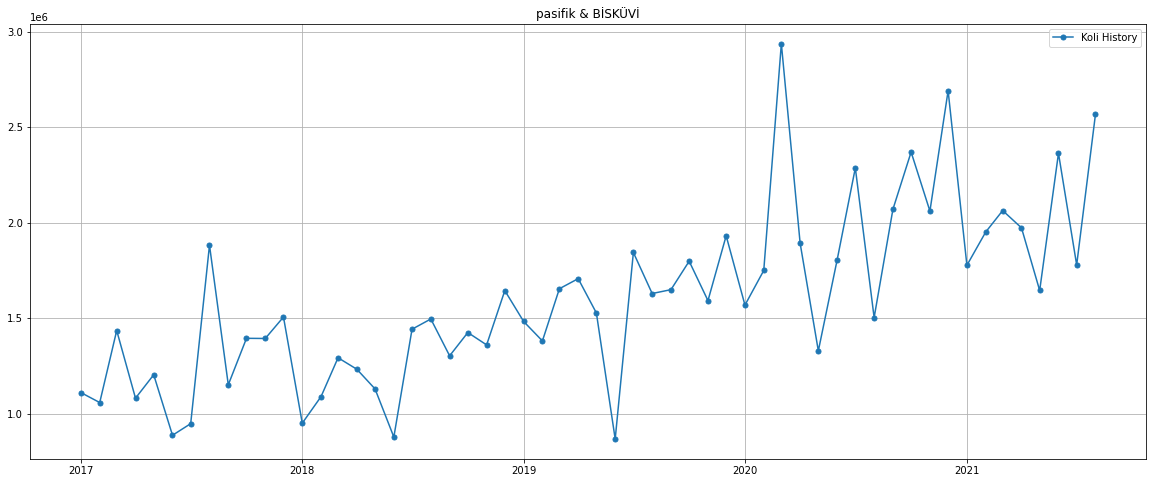

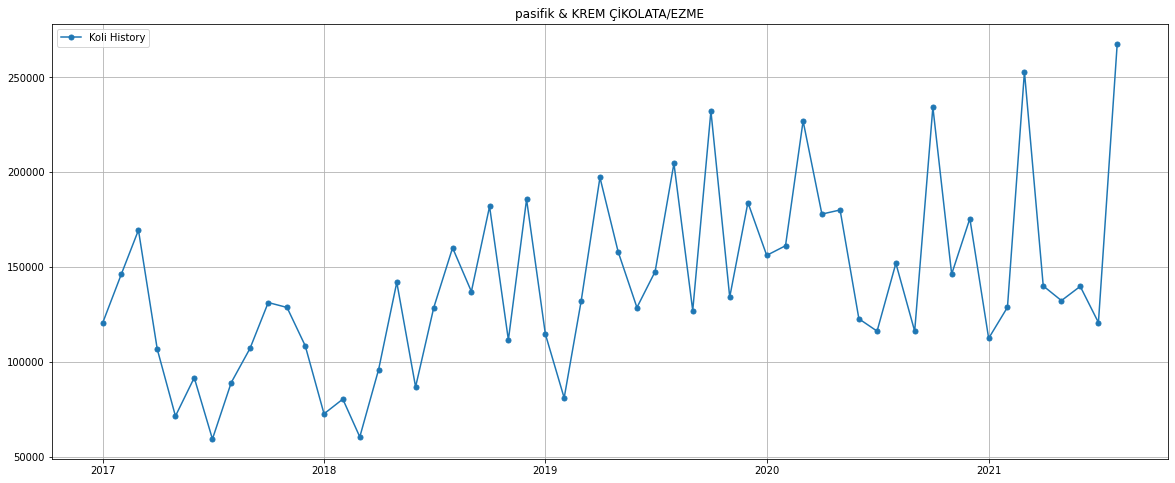

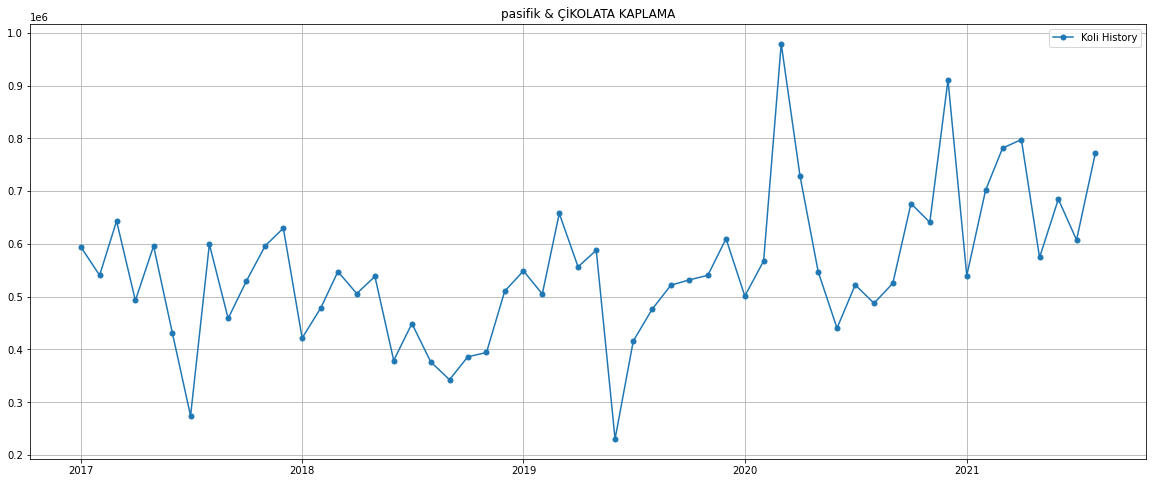

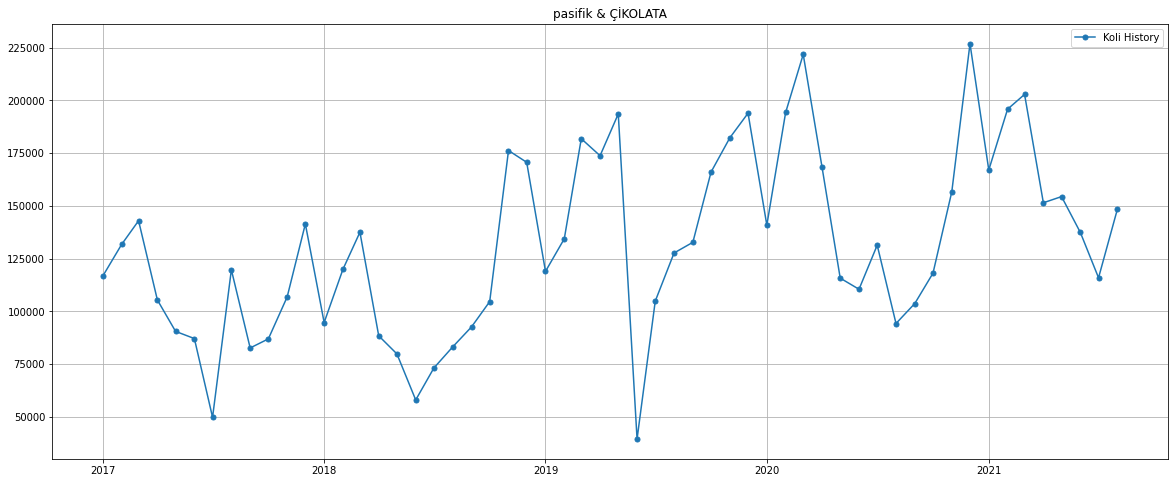

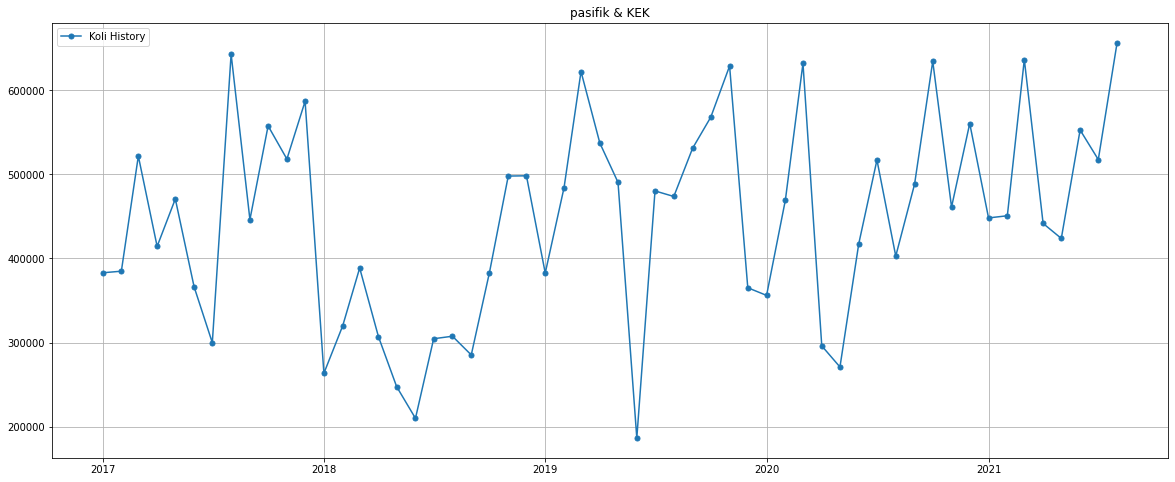

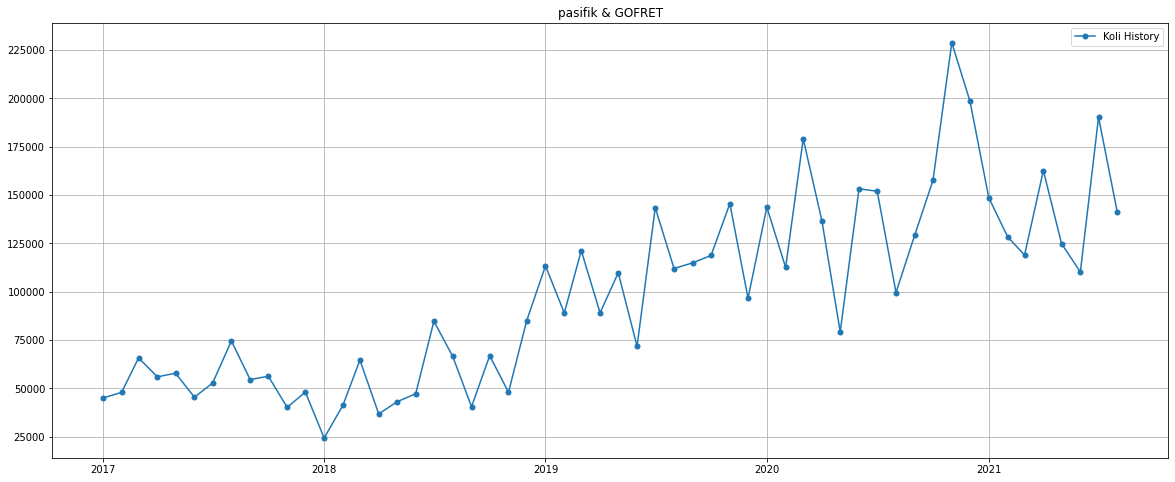

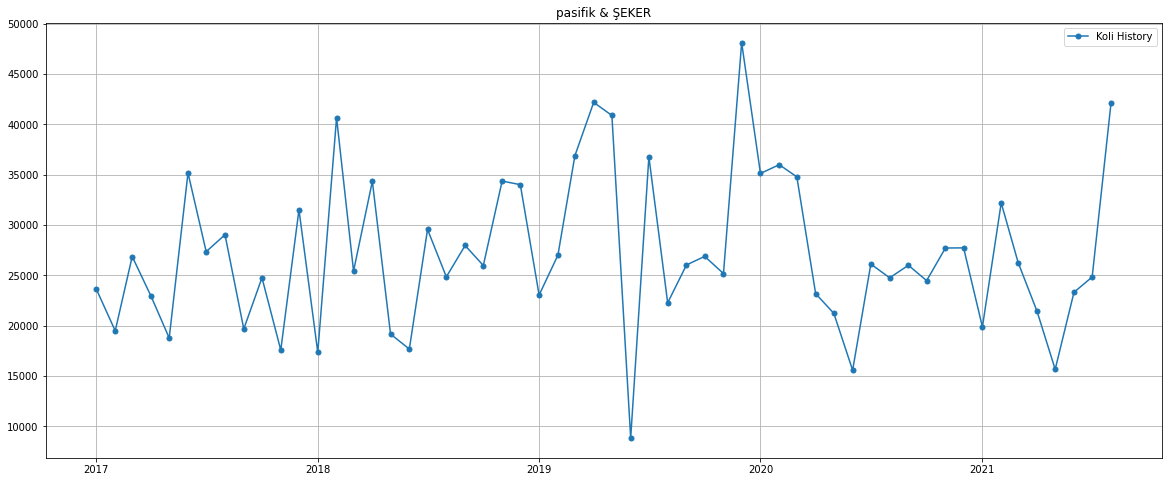

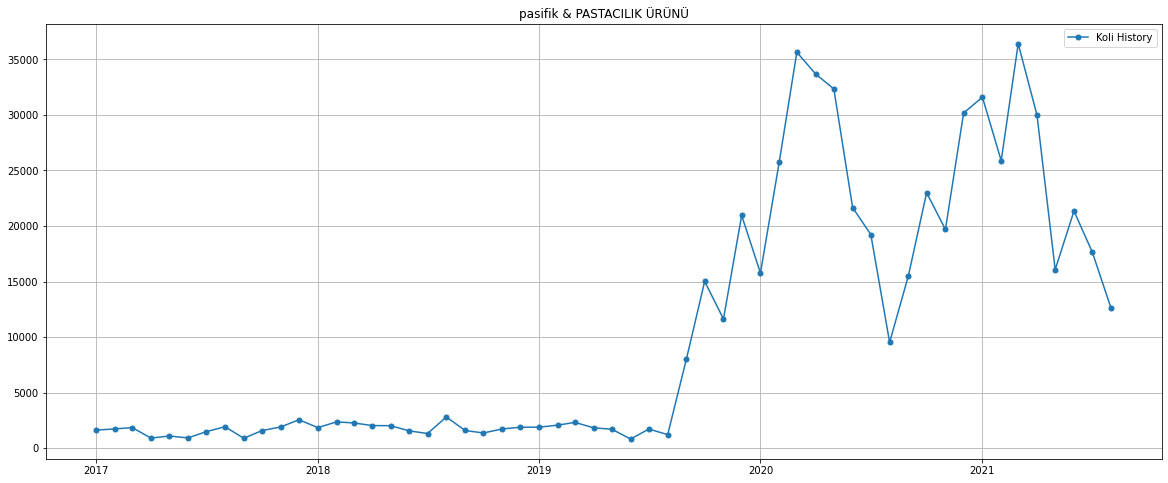

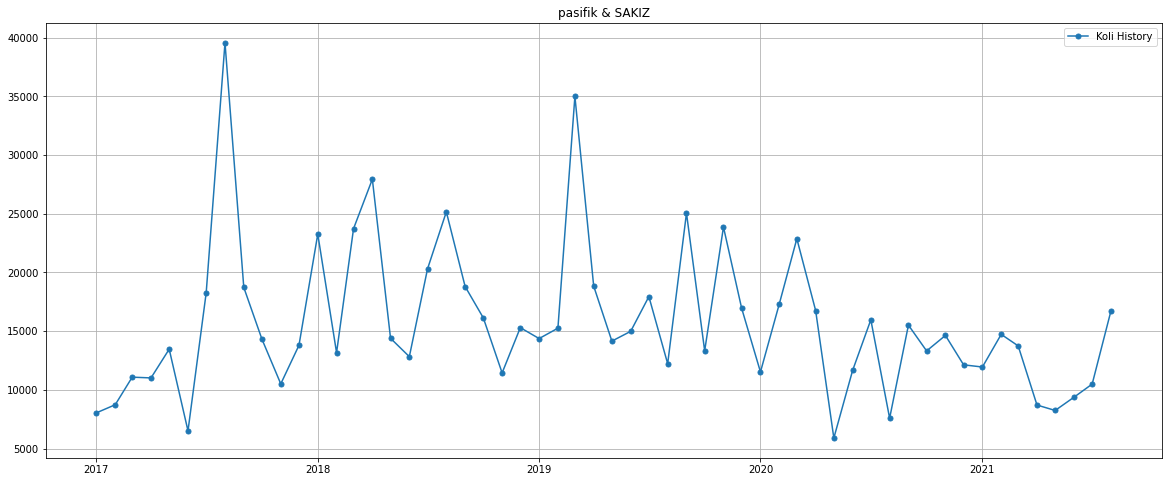

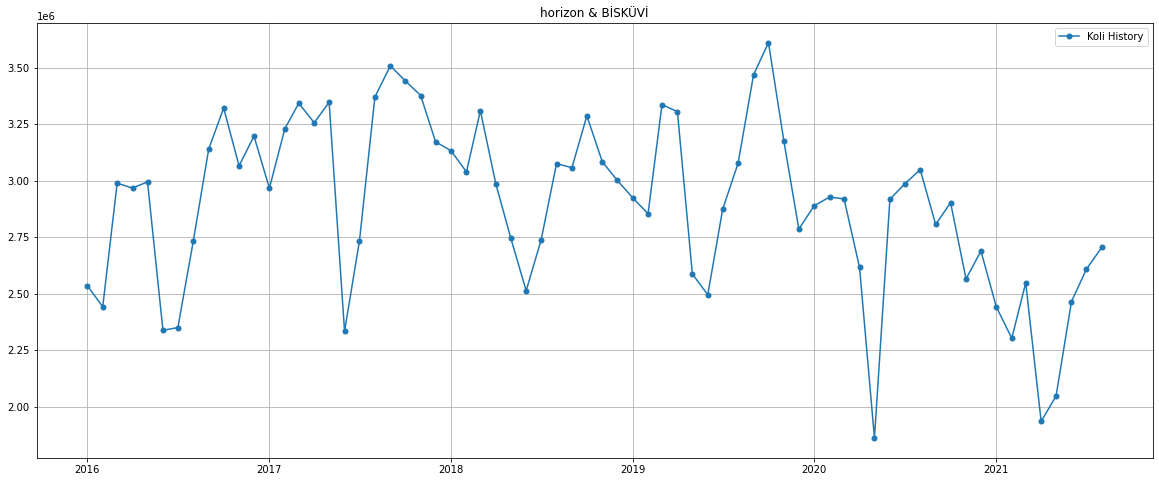

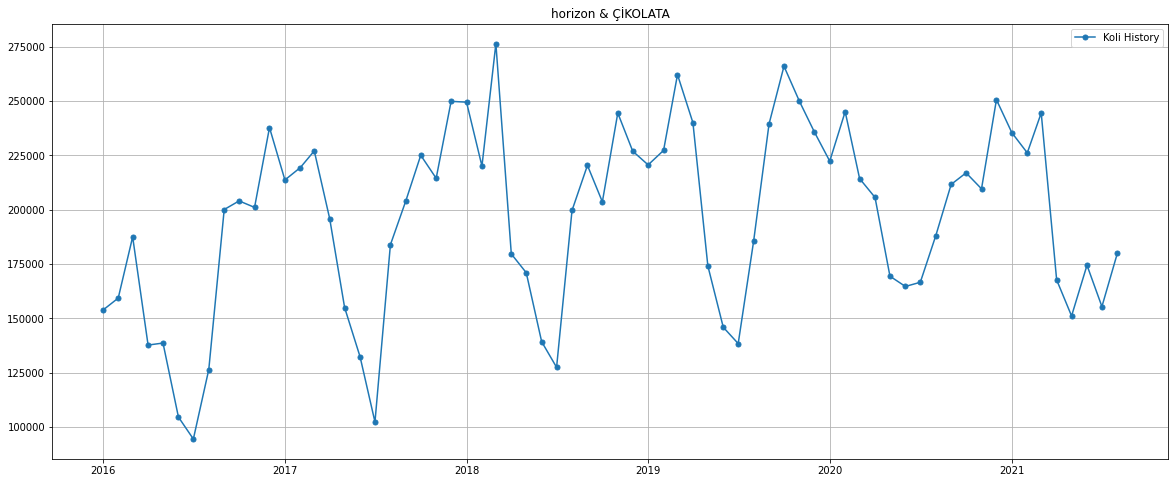

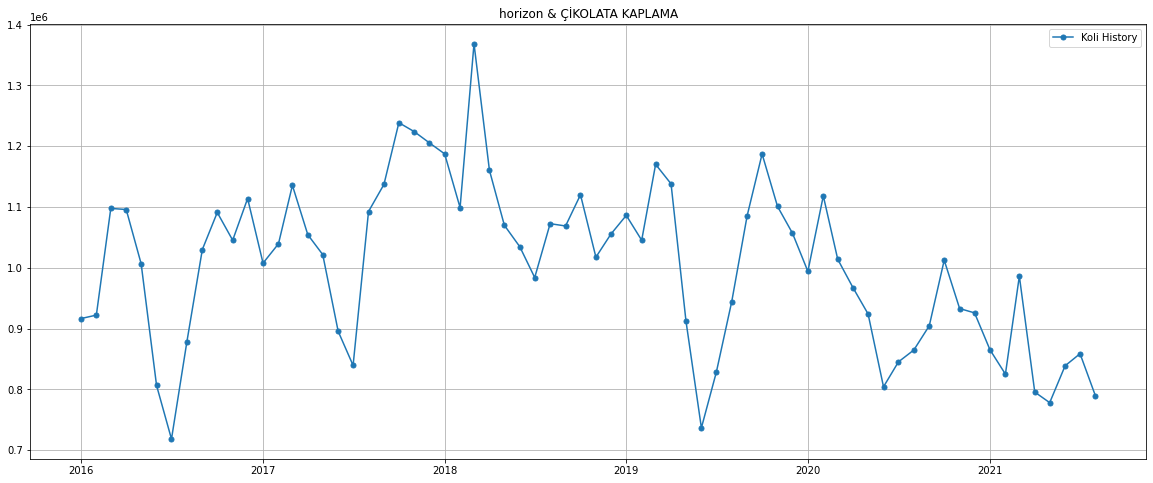

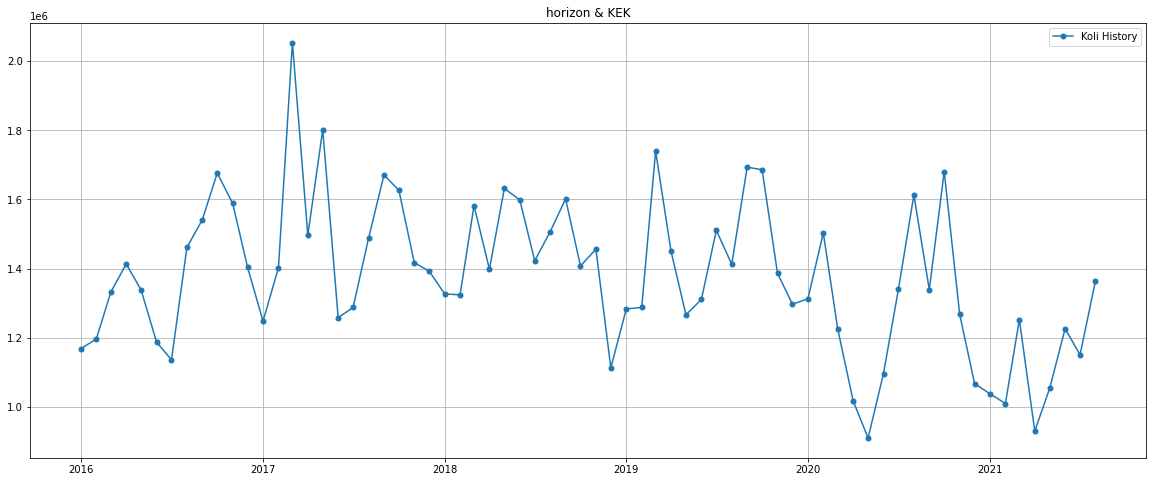

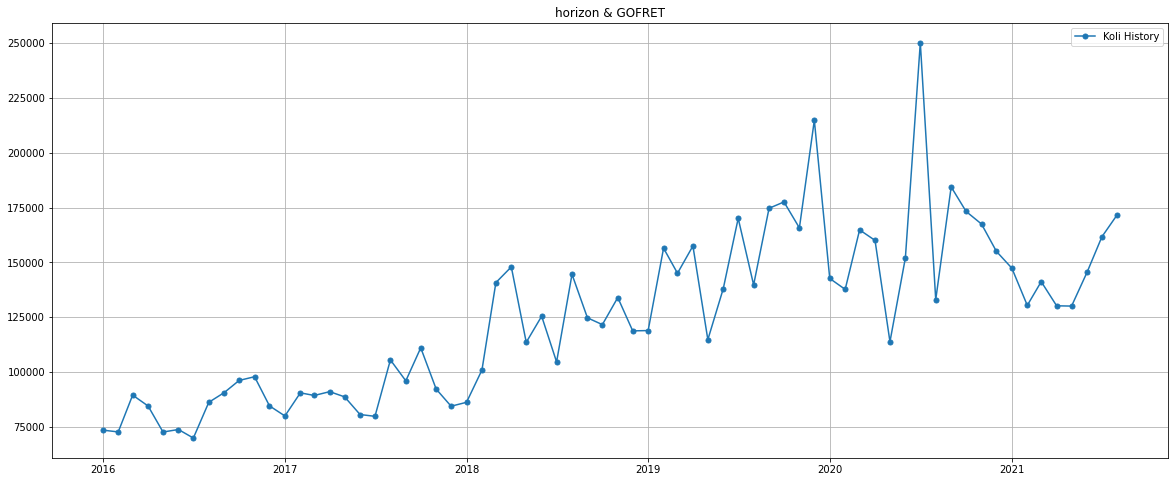

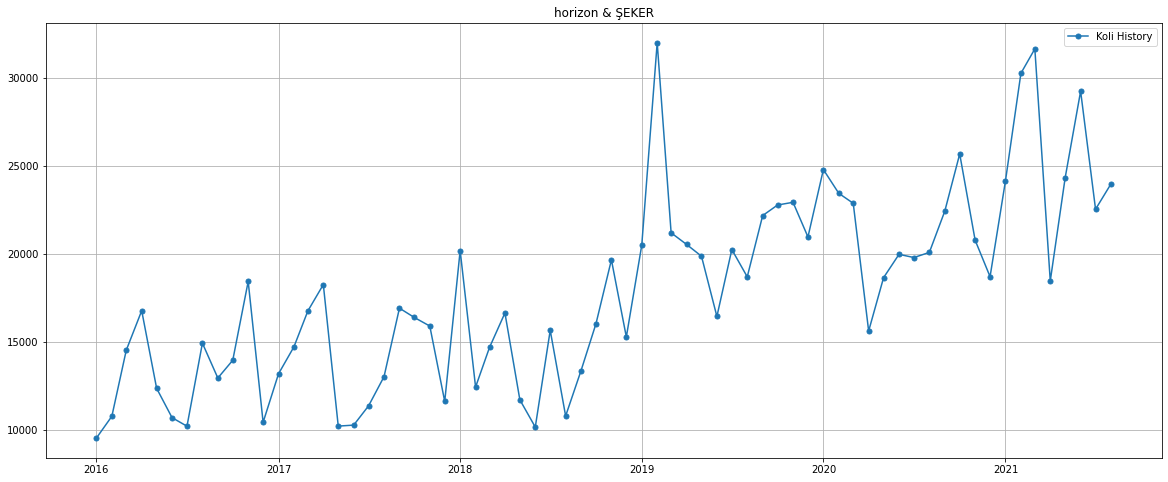

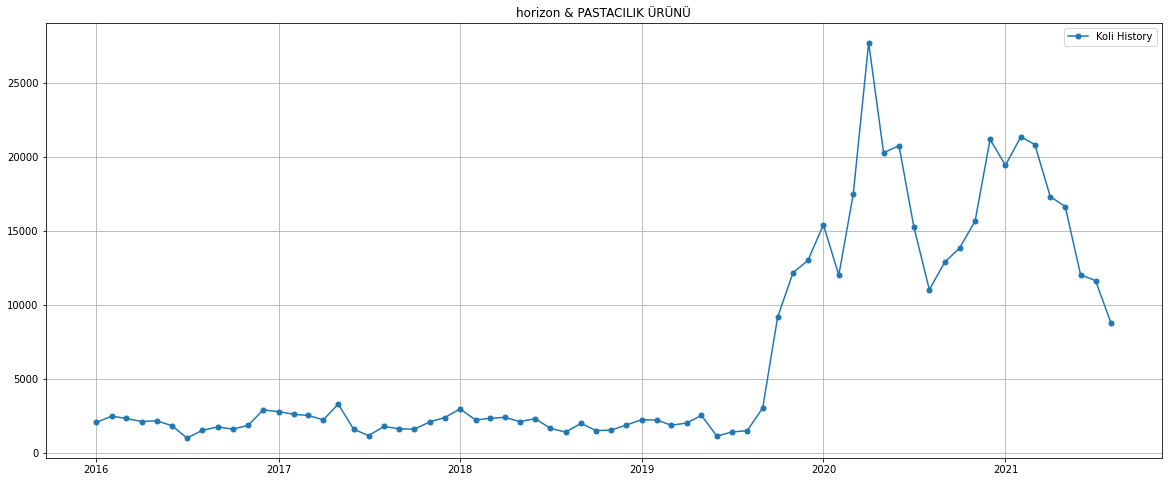

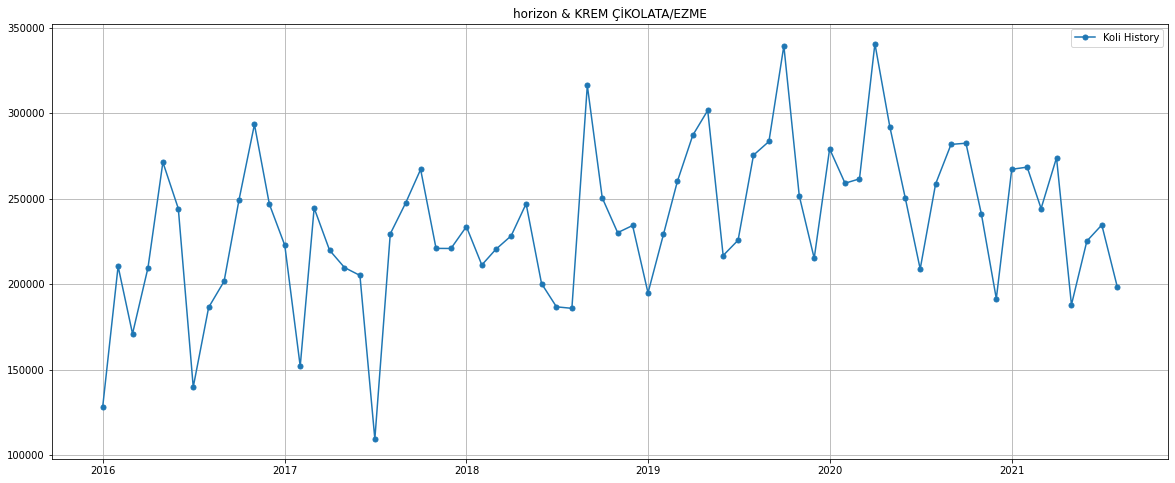

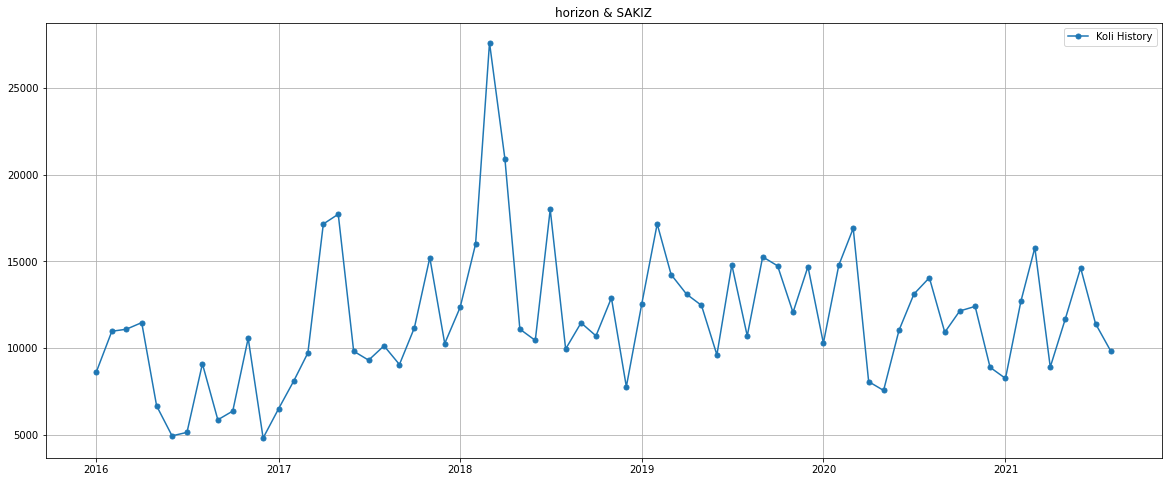

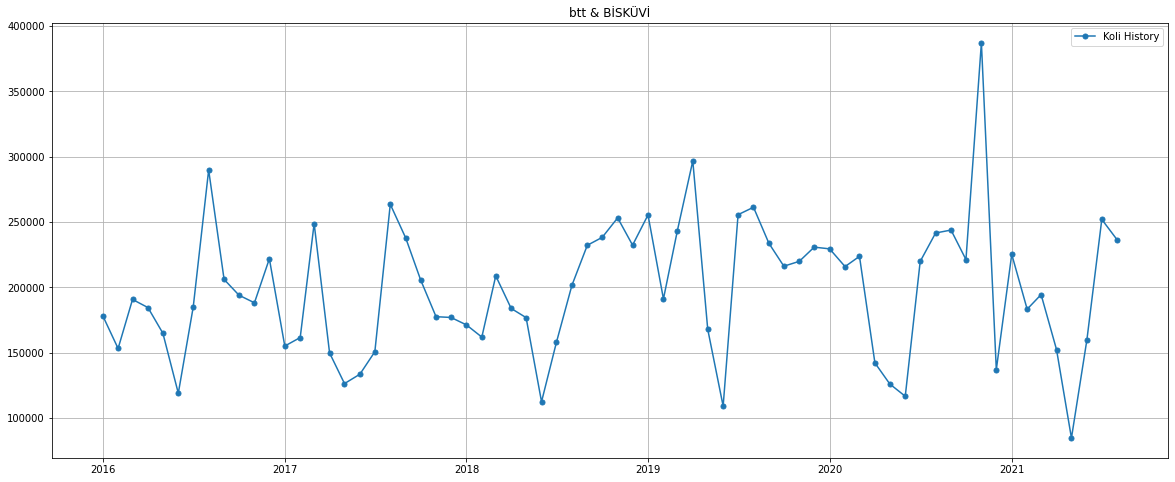

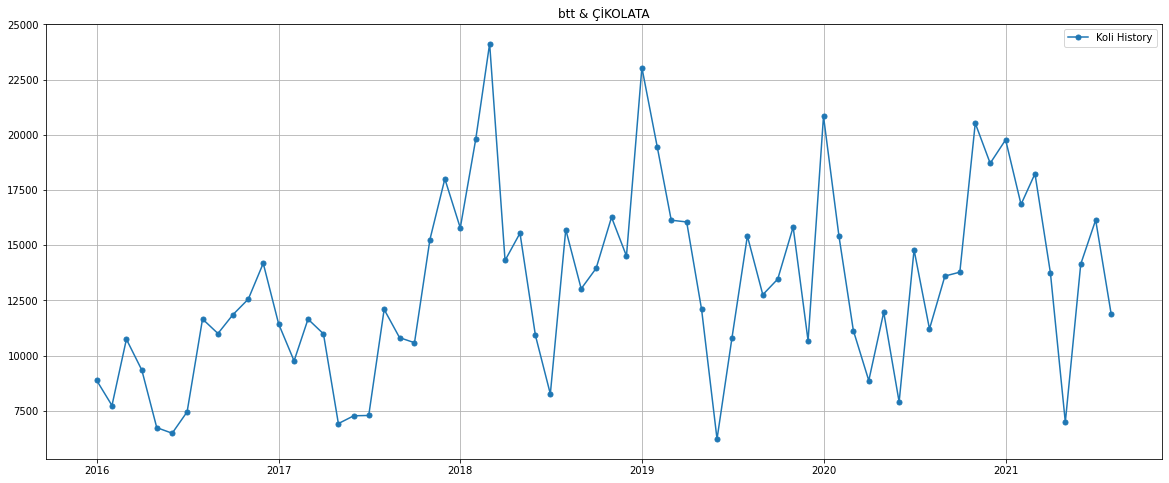

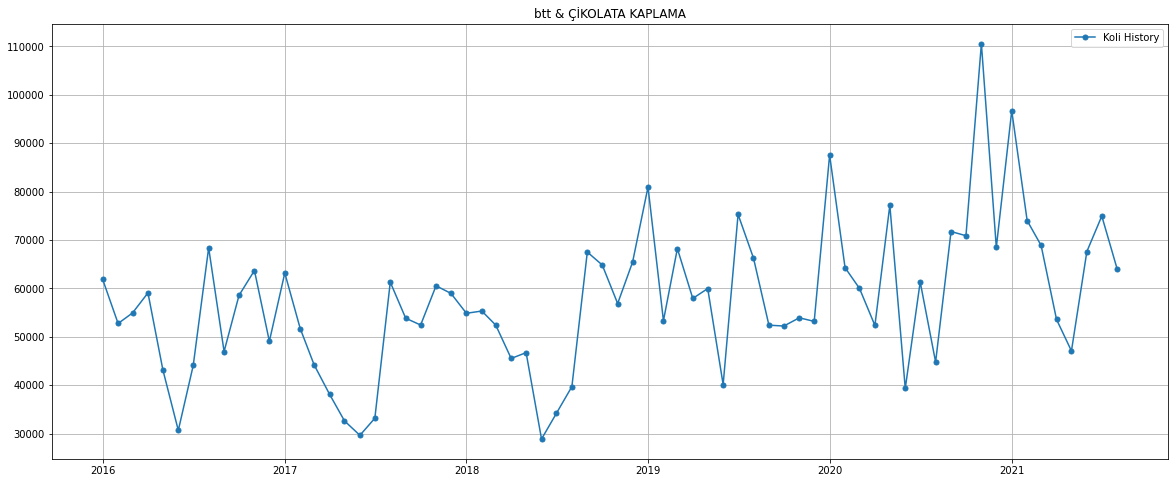

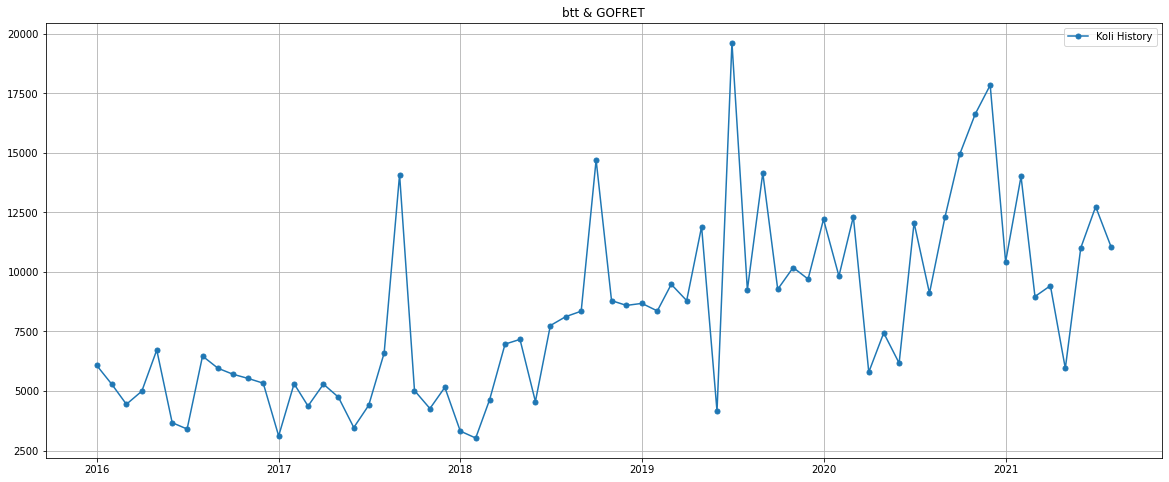

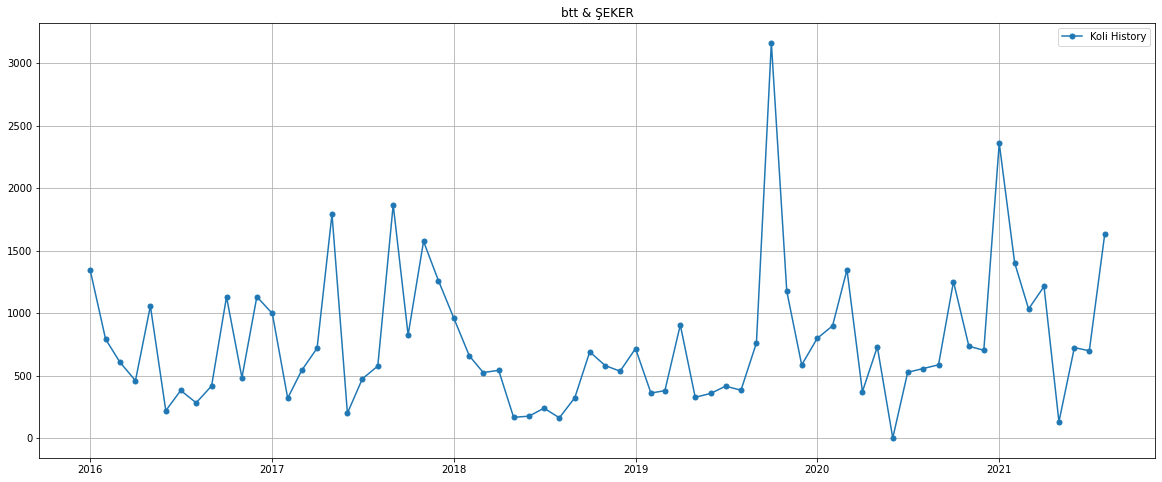

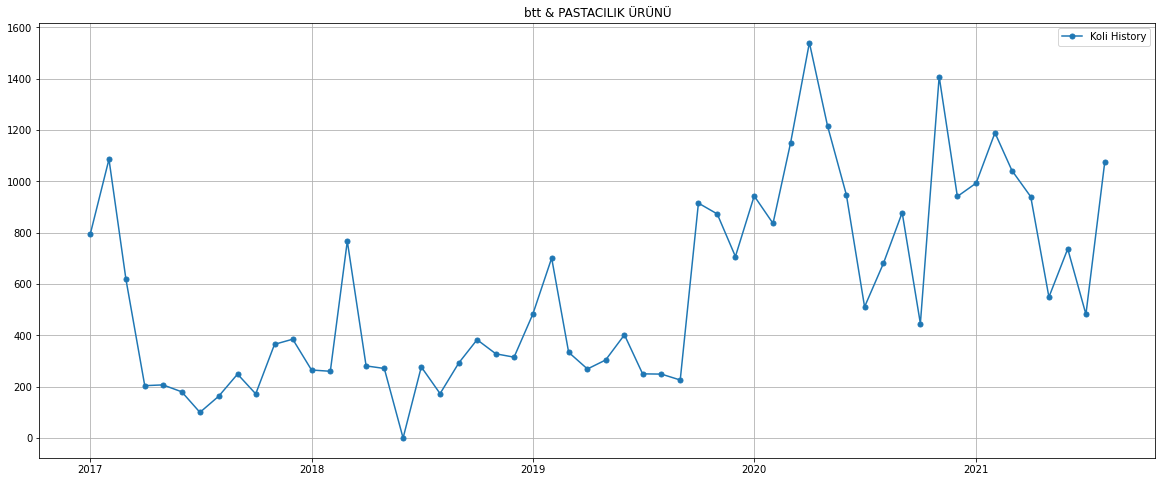

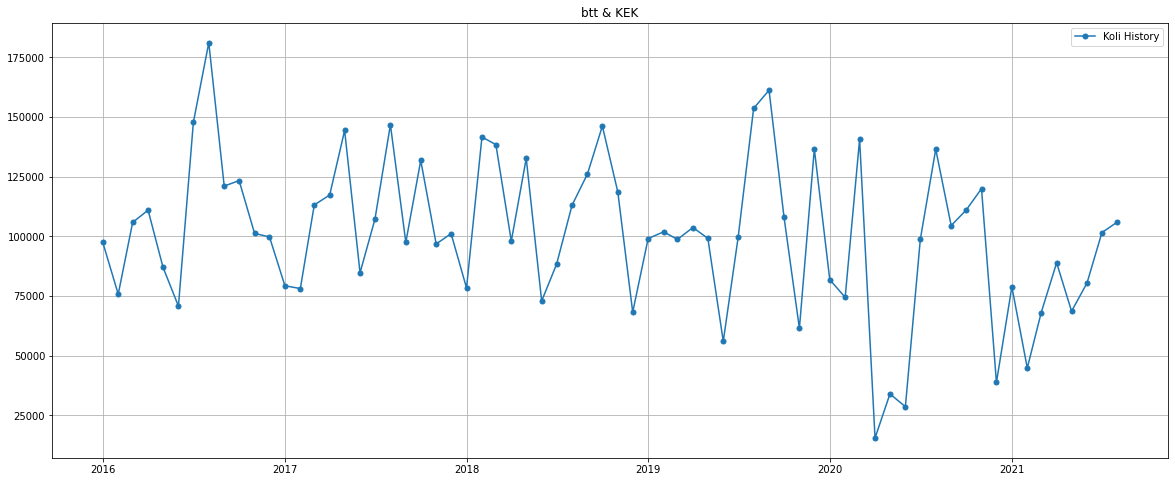

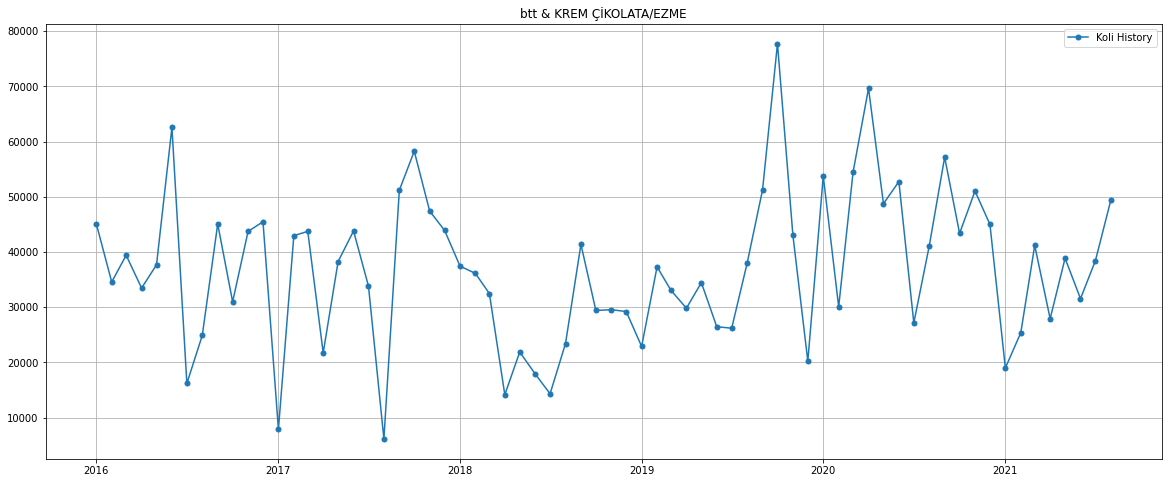

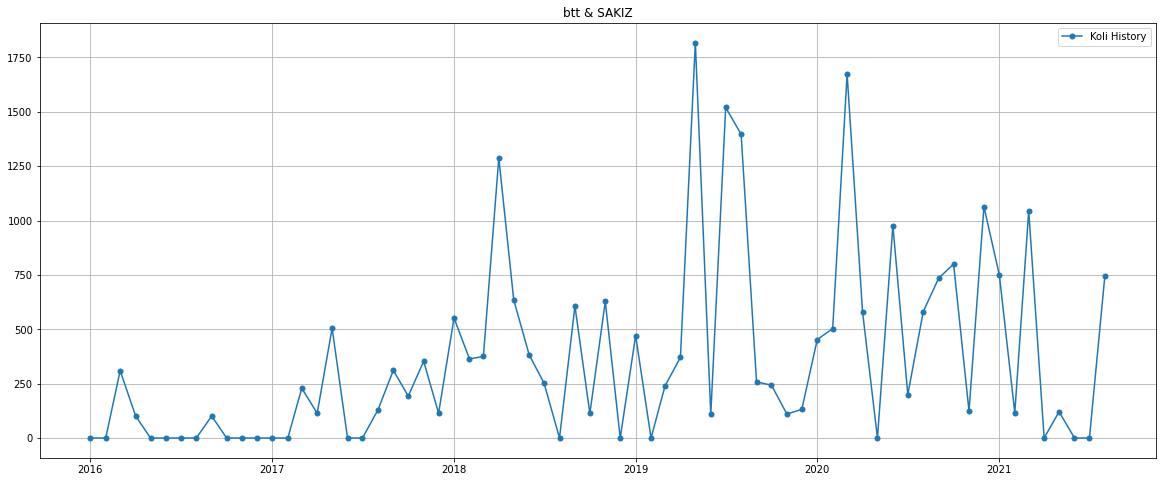

In [168]:
for idx in kanal_kat_unique.index:
    data_plot = df_all[(df_all["Kanal"] == kanal_kat_unique["Kanal"][idx]) & (df_all["kategori_adi"] == kanal_kat_unique["kategori_adi"][idx])]
    data_plot = data_plot.groupby(["date", "Kanal"]).agg({"koli_new": "sum"}).reset_index()
    plt.figure(figsize=(20, 8))
    plt.plot(data_plot['date'], data_plot["koli_new"], marker="o", markersize=5)
    plt.legend(["Koli History"])
    plt.title(f"{kanal_kat_unique['Kanal'][idx]} & {kanal_kat_unique['kategori_adi'][idx]}")
    plt.grid()
    plt.show()

---
# !!!!!
# Bu kısımda sadece pasifik için yapıyorum. Düzenledikten sonra horizon ve btt de dahil olacak
# !!!!!
---

In [170]:
df_all_backup = df_all.copy()

---
# Unique Fiyatların düzenlenmesi. Bazı kısımlarda na geldi çünkü önceki tarihlerin fiyatları yok. Data 2017 Ocak'ta başlıyor ama fiyat datası 2017 Aralıkta başlıyor. Bu durumdan dolayı missing imputation yaptım.
---

In [171]:
fiyat_unique.rename(columns={"kanal": "Kanal"}, inplace=True)

In [172]:
df_all_v2 = df_all.copy()
df_all_v2.en_guncel_kod = df_all_v2.en_guncel_kod.apply(lambda x: int(x))

In [173]:
fiyat_unique.en_guncel_kod = fiyat_unique.en_guncel_kod.apply(lambda x: int(x))

In [174]:
try:
    df_all_v2.drop(columns=["fiyat", "fiyat_gecisi"], axis=1, inplace=True)
except KeyError as e:
    print(e)

In [175]:
df_all_v2 = df_all_v2.merge(fiyat_unique, how="left", on=["date", "en_guncel_kod", "Kanal"])

In [176]:
null_fiyat_ = df_all_v2[df_all_v2["fiyat"].isna()][["grup_adi", "en_guncel_kod"]].drop_duplicates(subset=["grup_adi", "en_guncel_kod"], ignore_index=True)

In [177]:
df_all_v3 = df_all_v2.copy()
df_all_v3.fiyat.fillna(method="bfill", inplace=True)
df_all_v3.fiyat.fillna(0, inplace=True)
df_all_v3.fiyat_gecisi.fillna(method="bfill", inplace=True)
df_all_v3.fiyat_gecisi.fillna(0, inplace=True)

---
# Koli Missing Imputation (Mean)
---

In [178]:
def missing_imputation(df__, unique_grup, unique_sku, loop):
    print("Başla ------>", unique_grup[loop], unique_sku[loop])
    tmp = df__[(df__["grup_adi"] == unique_grup[loop]) & (df__["en_guncel_kod"] == unique_sku[loop])]
    if tmp["koli_new"].isna().sum() > 0:
        mean = tmp["koli_new"].mean()
        tmp.koli_new.fillna(mean, inplace=True)
    else: pass
    print("Bitti ------>", unique_grup[loop], unique_sku[loop])
    return tmp

In [179]:
unique_list = df_all_v3[["grup_adi", "en_guncel_kod"]].drop_duplicates(ignore_index=True)
unique_grup = unique_list["grup_adi"].to_list()
unique_sku = unique_list["en_guncel_kod"].to_list()

In [180]:
start_time = datetime.now()

In [181]:
df_all_v4 = []

if __name__ == "__main__":
    mp.freeze_support()
    available_cpu = mp.cpu_count() - 1
    df__ = df_all_v3.copy()
    func = partial(missing_imputation, df__, unique_grup, unique_sku)
    loop = list(unique_list.index)
    with mp.Pool(available_cpu) as p:
        df_all_v4.append(p.map(func, loop))

In [182]:
end_time = datetime.now()
print('Missing Imputation: {}'.format(end_time - start_time))

Missing Imputation: 0:00:32.889773


In [183]:
df_all_v4 = pd.concat(df_all_v4[0], ignore_index=True)

In [184]:
df_all_v4["koli_new"].fillna(0, inplace=True)

---
# Trend Seasonality Decomposition with parallel processsing
---

In [185]:
unique_list = df_all_v4.drop_duplicates(subset=["grup_adi", "en_guncel_kod"], ignore_index=True)[["grup_adi", "en_guncel_kod"]]
unique_grup = unique_list["grup_adi"].to_list()
unique_en_guncel_kod = unique_list["en_guncel_kod"].to_list()

In [186]:
df_all_v4.drop_duplicates(ignore_index=True, inplace=True)

In [187]:
def trend_seasonality_decomp(df__, unique_grup, unique_en_guncel_kod, loop):
    from statsmodels.tsa.seasonal import STL
    import numpy as np
    print("Başladı ---------->", unique_grup[loop], unique_en_guncel_kod[loop])
    temp_df = df__[(df__["en_guncel_kod"] == unique_en_guncel_kod[loop]) & 
                   (df__["grup_adi"] == unique_grup[loop])]
    if len(temp_df) > 2:
        df_ts = temp_df[['koli_new','date']]
        df_ts.set_index('date',inplace=True)

        result = STL(df_ts).fit()
        temp_df['season'] = list(result.seasonal)
        temp_df['trend']  = list(result.trend)
        temp_df['residual']  = list(result.resid)
    else:
        temp_df['season'] = np.nan
        temp_df['trend']  = np.nan
        temp_df['residual']  = np.nan
    print("Bitti ---------->", unique_grup[loop], unique_en_guncel_kod[loop])
    return temp_df

In [188]:
start_time = datetime.now()

In [189]:
df_all_v5 = []

if __name__ == "__main__":
    mp.freeze_support()
    available_cpu = mp.cpu_count() - 1
    df__ = df_all_v4.copy()
    func = partial(trend_seasonality_decomp, df__, unique_grup, unique_en_guncel_kod)
    loop = list(unique_list.index)
    with mp.Pool(available_cpu) as p:
        df_all_v5.append(p.map(func, loop))

In [190]:
end_time = datetime.now()
print('Dataların yüklenmesi: {}'.format(end_time - start_time))

Dataların yüklenmesi: 0:01:21.704471


In [191]:
df_all_v5 = pd.concat(df_all_v5[0], ignore_index=True)

In [193]:
fiyat_next_four = df_all_v5[["grup_adi", "en_guncel_kod", "fiyat", "date"]]
fiyat_next_four.sort_values(by=["grup_adi", "en_guncel_kod", "date"], ascending=[True, True, False], inplace=True, ignore_index=True)
fiyat_next_four = fiyat_next_four.groupby(["grup_adi", "en_guncel_kod"]).agg({"date": "max", "fiyat": "max"}).reset_index()
fiyat_next_four = fiyat_next_four[["grup_adi", "en_guncel_kod", "fiyat"]].drop_duplicates(ignore_index=True)

---
# Scope Belirleme (24 aylık veri varsa time series çalışsın. Yoksa moving average)
---

In [194]:
def scope(df__, unique_grup, unique_sku, threshold, loop):
    print("Başla ----->", loop)
    tmp = df__[(df__["grup_adi"] == unique_grup[loop]) & (df__["en_guncel_kod"] == unique_sku[loop])]
    if len(tmp[tmp["koli"] != 0]) >= 24:
        tmp["scope"] = "time_series"
    else:
        tmp["scope"] = "moving_average"
    print("Bitti ----->", loop)
    return tmp

In [195]:
unique_list = df_all_v5[["grup_adi", "en_guncel_kod"]].drop_duplicates(ignore_index=True)
unique_grup = unique_list["grup_adi"].to_list()
unique_sku = unique_list["en_guncel_kod"].to_list()

In [196]:
start_time = datetime.now()

In [197]:
df_all_v6 = []

if __name__ == "__main__":
    mp.freeze_support()
    available_cpu = mp.cpu_count() - 1
    df__ = df_all_v5.copy()
    func = partial(scope, df__, unique_grup, unique_sku, 24)
    loop = list(unique_list.index)
    with mp.Pool(available_cpu) as p:
        df_all_v6.append(p.map(func, loop))

In [198]:
end_time = datetime.now()
print('Dataların yüklenmesi: {}'.format(end_time - start_time))

Dataların yüklenmesi: 0:01:18.043323


In [199]:
df_all_v6 = pd.concat(df_all_v6[0], ignore_index=True)

In [201]:
grup_sku_unique = df_all_v6.drop_duplicates(subset=["grup_adi", "en_guncel_kod"], ignore_index=True)[["grup_adi", "en_guncel_kod"]]
grup_akt_dict = {}
for idx in grup_sku_unique.index:
    tmp_df = df_all_v6[(df_all_v6["grup_adi"] == grup_sku_unique["grup_adi"][idx]) & 
                       (df_all_v6["en_guncel_kod"] == grup_sku_unique["en_guncel_kod"][idx])]
    akt_dict = {}
    for akt in tmp_df.aktivite_tipi.unique():
        ratio = tmp_df[(tmp_df["koli"] != 0) & (tmp_df["aktivite_tipi"] == akt)]["koli"].mean() / tmp_df[(tmp_df["koli"] != 0) & (tmp_df["aktivite_tipi"] == "Yok")]["koli"].mean()
        akt_dict.update({akt: ratio})
    grup_akt_dict.update({grup_sku_unique.loc[idx, "grup_adi"] + "_" + str(grup_sku_unique.loc[idx, "en_guncel_kod"]): akt_dict})

In [202]:
grup_akt_dict2 = grup_akt_dict.copy()
for idx in grup_akt_dict2.keys():
    grup_akt_dict2[idx] = {key_: value_ for key_, value_ in sorted(grup_akt_dict2[idx].items(), key=lambda x: x[1], reverse=True)}
    new_values = sorted([i for i in range(0, len(grup_akt_dict2[idx])*5, 5)], reverse=True)
    for index_, value_ in enumerate(grup_akt_dict2[idx]):
        grup_akt_dict2[idx][value_] = new_values[index_]

In [203]:
unique_akt_list = list(df_all_v6.aktivite_tipi.unique())

In [204]:
for key_ in grup_akt_dict2.keys():
    for i in unique_akt_list:
        if i not in list(grup_akt_dict2[key_].keys()):
            grup_akt_dict2[key_].update({i: 0})
        else:
            pass

In [205]:
df_all_v7 = []
unique_grup_sku = df_all_v6[["grup_adi", "en_guncel_kod"]].drop_duplicates(ignore_index=True)
for idx in unique_grup_sku.index:
    tmp_df = df_all_v6[(df_all_v6["grup_adi"] == unique_grup_sku.loc[idx, "grup_adi"]) & (df_all_v6["en_guncel_kod"] == unique_grup_sku.loc[idx, "en_guncel_kod"])]
    tmp_df.aktivite_tipi = tmp_df.aktivite_tipi.map(grup_akt_dict2[unique_grup_sku.loc[idx, "grup_adi"] + "_" + str(unique_grup_sku.loc[idx, "en_guncel_kod"])])
    df_all_v7.append(tmp_df)
df_all_v7 = pd.concat(df_all_v7, ignore_index=True)

In [206]:
indirim_bins = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 
                0.06, 0.07, 0.08, 0.09, 0.10, 
                0.15, df_all_v7.indirim__.max()+1]
len(indirim_bins) , df_all_v7.indirim__.value_counts(bins=indirim_bins).sort_index()
df_all_v7['indirim__bins'] = pd.cut(df_all_v7.indirim__, indirim_bins).cat.codes

In [207]:
df_all_v7["indirim__bins"] = df_all_v7["indirim__"].apply(lambda x: 0 if x <= 0 else 
                                                          (1 if x <= 0.01 else 
                                                           (2 if x <= 0.02 else 
                                                            (3 if x <= 0.03 else 
                                                             (4 if x <= 0.04 else 
                                                              (5 if x <= 0.05 else 
                                                               (6 if x <= 0.06 else 
                                                                (7 if x <= 0.07 else 
                                                                 (8 if x <= 0.08 else 
                                                                  (9 if x <= 0.09 else 
                                                                   (10 if x <= 0.10 else 
                                                                    (12.5 if x <= 0.15 else 15))))))))))))

In [208]:
marka_df = df_all_v7.groupby(["date", "Kanal", "grup_adi", "ana_kategori_adi", "kategori_adi", "marka_adi"]).agg({"koli_new": "sum"}).reset_index()

In [209]:
marka_unique = marka_df[["Kanal", "grup_adi", "ana_kategori_adi", "kategori_adi", "marka_adi"]].drop_duplicates(ignore_index=True)

In [210]:
marka_trend_seasonality_df = []
for idx in marka_unique.index:
    temp_df = marka_df[(marka_df["Kanal"] == marka_unique.loc[idx, "Kanal"]) &
                       (marka_df["grup_adi"] == marka_unique.loc[idx, "grup_adi"]) & 
                       (marka_df["ana_kategori_adi"] == marka_unique.loc[idx, "ana_kategori_adi"]) & 
                       (marka_df["kategori_adi"] == marka_unique.loc[idx, "kategori_adi"]) & 
                       (marka_df["marka_adi"] == marka_unique.loc[idx, "marka_adi"])]
    if len(temp_df) > 2:
        df_ts = temp_df[['koli_new','date']]
        df_ts.set_index('date',inplace=True)

        result = STL(df_ts).fit()
        temp_df['season_marka'] = list(result.seasonal)
        temp_df['trend_marka']  = list(result.trend)
        temp_df['residual_marka']  = list(result.resid)
    else:
        temp_df['season_marka'] = np.nan
        temp_df['trend_marka']  = np.nan
        temp_df['residual_marka']  = np.nan
    marka_trend_seasonality_df.append(temp_df)
marka_trend_seasonality_df = pd.concat(marka_trend_seasonality_df, ignore_index=True)

In [211]:
try: 
    marka_trend_seasonality_df.drop("koli_new", axis=1, inplace=True)
except KeyError as e:
    print(e)
    pass
df_all_v8 = df_all_v7.copy()

In [212]:
df_all_v8 = df_all_v8.merge(marka_trend_seasonality_df, how="left")

In [213]:
df_all_v8["model_input_info"] = df_all_v8["Kanal"] + "_" + df_all_v8["kategori_adi"]

In [214]:
try:
    calender_df["date"] = pd.to_datetime(calender_df["Yıl"].astype(str) + "-" + calender_df["Ay"].astype(str) + "-01", format="%Y-%m-%d", errors="coerce")
except:
    calender_df["date"] = pd.to_datetime(calender_df["yil"].astype(str) + "-" + calender_df["ay"].astype(str) + "-01", format="%Y-%m-%d", errors="coerce")

In [215]:
calender_df.rename(columns=chng_cols, inplace=True)

In [216]:
calender_df["back_to_school"] = calender_df["ay"].apply(lambda x: 1 if x in [9, 2] else 0)

---
# Modelleme Kısmı
---

#### Modellemede hangi kategoride hangi sütunlar kullanılacak kısmı için model_input_info şeklinde yeni bir sütun açtık.

---
---
---
# Time Series (LSTM)
---
---
---

In [217]:
def create_dataset_future(X, time_steps=1):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
    return np.array(Xs)

In [218]:
def create_dataset2(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [219]:
RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [220]:
df_all_v8.kategori_adi.unique()

array(['BİSKÜVİ', 'KREM ÇİKOLATA/EZME', 'ÇİKOLATA KAPLAMA', 'ÇİKOLATA',
       'KEK', 'GOFRET', 'ŞEKER', 'PASTACILIK ÜRÜNÜ', 'SAKIZ'],
      dtype=object)

In [221]:
df_all_v8[(df_all_v8["en_guncel_kod"] == 136306) & (df_all_v8["Kanal"] == "pasifik")].scope.unique()

array(['moving_average'], dtype=object)

In [269]:
ts_df = df_all_v8[df_all_v8["scope"] == "time_series"]
#ts_df = ts_df[(ts_df["kategori_adi"] == "ŞEKER") & (ts_df["Kanal"] == "pasifik")]
ts_df = ts_df[(ts_df["Kanal"] == "pasifik")]
grup_sku_unique = ts_df[["grup_adi", "en_guncel_kod"]].drop_duplicates(ignore_index=True)

In [270]:
len(grup_sku_unique)

284

In [278]:
all_final_preds = []

In [ ]:
#for idx in tqdm(grup_sku_unique.index):
max_date = ts_df.date.max()
iterated_results = []
iteration_ = 0
while iteration_ < 5:
#    for idx in [9, 10, 16, 17]:
    print("="*len("Iteration --> 0"))
    print("Iteration -->", iteration_+1)
    print("="*len("Iteration --> 0"))
    print()
    for idx in tqdm(grup_sku_unique.index):
#    for idx in tqdm([0]):
        for learn_rate in [0.05, 0.1, 0.2]:
#            print("iteration:",iteration_,"--->",grup_sku_unique.loc[idx, "grup_adi"], grup_sku_unique.loc[idx, "en_guncel_kod"], learn_rate)
            ts_df_sku = ts_df[(ts_df["grup_adi"] == grup_sku_unique.loc[idx, "grup_adi"]) & (ts_df["en_guncel_kod"] == grup_sku_unique.loc[idx, "en_guncel_kod"])]
            ts_df_sku.set_index("date", inplace=True)
            model_input_info = {
                
                "pasifik_BİSKÜVİ": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi"],
                "pasifik_KREM ÇİKOLATA/EZME": ["indirim__", "fiyat", "school_day_ratio", "total_holiday_ratio", "aktivite_tipi"],
                "pasifik_ÇİKOLATA KAPLAMA": ["fiyat", "indirim__", "school_day_ratio", "ramadan_ratio", "aktivite_tipi"],
                "pasifik_ÇİKOLATA": ["fiyat", "indirim__", "school_day_ratio", "ramadan_ratio", "aktivite_tipi"],
                "pasifik_KEK": ["fiyat", "school_day_ratio", "ramadan_ratio", "aktivite_tipi"],
                "pasifik_GOFRET": ["fiyat", "indirim__", "school_day_ratio", "total_holiday_ratio", "aktivite_tipi"],
                "pasifik_ŞEKER": ["fiyat", "indirim__", "total_holiday_ratio", "ramadan_ratio", "aktivite_tipi"],
                "pasifik_PASTACILIK ÜRÜNÜ": ["fiyat", "indirim__", "aktivite_tipi"],
                "pasifik_SAKIZ": ["fiyat", "indirim__", "weekdays_ratio", "ramadan_ratio", "aktivite_tipi"],

                "horizon_BİSKÜVİ": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi"],
                "horizon_ÇİKOLATA": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi"],
                "horizon_ÇİKOLATA KAPLAMA": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi"],
                "horizon_KEK": ["fiyat", "indirim__", "school_day_ratio", "back_to_school", "ramadan_ratio", "school_day_ratio", "aktivite_tipi"],
                "horizon_GOFRET": ["fiyat", "indirim__", "school_day_ratio", "total_holiday_ratio", "aktivite_tipi"],
                "horizon_ŞEKER": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi"],
                "horizon_PASTACILIK ÜRÜNÜ": ["fiyat", "indirim__", "ramadan_ratio", "total_holiday_ratio", "aktivite_tipi"],
                "horizon_KREM ÇİKOLATA/EZME": ["fiyat", "indirim__", "ramadan_ratio", "total_holiday_ratio", "school_day_ratio", "aktivite_tipi"], 
                "horizon_SAKIZ": ["fiyat", "indirim__", "school_day_ratio", "total_holiday_ratio", "aktivite_tipi"], 

                "btt_BİSKÜVİ": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi"],
                "btt_ÇİKOLATA": ["fiyat", "indirim__", "school_day_ratio", "aktivite_tipi", "ramadan_ratio"],
                "btt_ÇİKOLATA KAPLAMA": ["fiyat", "indirim__", "aktivite_tipi", "ramadan_ratio", "back_to_school", "school_day_ratio"],
                "btt_GOFRET": ["fiyat", "indirim__", "aktivite_tipi", "ramadan_ratio", "total_holiday_ratio"],
                "btt_ŞEKER": ["fiyat", "indirim__", "aktivite_tipi", "school_day_ratio", "total_holiday_ratio", "weekdays_ratio"],
                "btt_PASTACILIK ÜRÜNÜ": ["fiyat", "indirim__", "aktivite_tipi", "school_day_ratio", "total_holiday_ratio", "no_of_days"],
                "btt_KEK": ["fiyat", "indirim__", "aktivite_tipi", "school_day_ratio", "total_holiday_ratio"],
                "btt_KREM ÇİKOLATA/EZME": ["fiyat", "indirim__", "aktivite_tipi", "school_day_ratio"],
                "btt_SAKIZ": ["indirim__", "aktivite_tipi", "total_holiday_ratio", "school_day_ratio"]

            }

            for key_ in model_input_info.keys():
                model_input_info[key_].extend(["trend", "season", "indirim__bins", "trend_marka", "season_marka", "koli_new"])
                try:
                    model_input_info[key_].remove("indirim__")
                except ValueError:
                    pass
            f_columns = model_input_info[ts_df_sku["model_input_info"].unique()[0]]
            ts_df_sku = ts_df_sku[f_columns]
        #    print(ts_df_sku.shape)
            if (ts_df_sku["trend"].values==ts_df_sku["trend_marka"].values).any():
                f_columns.remove("trend_marka")
                f_columns.remove("season_marka")
            else:
                pass
            
            ts_df_sku = ts_df_sku[f_columns]
            #print(ts_df_sku)

            f_transformer = RobustScaler()
            koli_transformer = RobustScaler()

            y_col = [i for i in f_columns if i == "koli_new"]
            f_columns.remove("koli_new")

            f_transformer = f_transformer.fit(ts_df_sku[f_columns].to_numpy())
            koli_transformer = koli_transformer.fit(ts_df_sku[y_col])

            ts_df_sku.loc[:, f_columns] = f_transformer.transform(ts_df_sku[f_columns].to_numpy())
            ts_df_sku['koli_new'] = koli_transformer.transform(ts_df_sku[y_col])


            time_steps = 3
            # reshape to [samples, time_steps, n_features]
            X_train, y_train = create_dataset2(ts_df_sku.iloc[:,:-1], ts_df_sku.iloc[:, -1:], time_steps)
        #    print(X_train.shape, y_train.shape)

            model = keras.Sequential()
            model.add(
              keras.layers.Bidirectional(
                keras.layers.LSTM(
                  units=128, 
                  input_shape=(X_train.shape[1], X_train.shape[2])
                )
              )
            )
            model.add(keras.layers.Dropout(rate=learn_rate))
            model.add(keras.layers.Dense(units=1))
            model.compile(loss='mean_squared_error', optimizer='adam')

            history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32, verbose=0, shuffle=False)
            kntrl = df_all_v8[(df_all_v8["grup_adi"] == grup_sku_unique.loc[idx, "grup_adi"]) & (df_all_v8["en_guncel_kod"] == grup_sku_unique.loc[idx, "en_guncel_kod"])]
            season_trend_add = kntrl[(kntrl["date"] <= max(all_dates) - relativedelta(years=1)) & (kntrl["date"] >= min(all_dates) - relativedelta(years=1))][["date", "trend", "season", "trend_marka", "season_marka"]]

            future_X_part1 = ts_df_sku.iloc[-3:, :-1]
            future_X = ts_df_sku.iloc[-4:, :-1]
            future_X.reset_index(inplace=True)

            all_cols_unique = []
            for i,j in model_input_info.items():
                all_cols_unique.extend(j)

            all_cols_unique = list(set(all_cols_unique))
            all_cols_unique.remove("koli_new")
            all_cols_unique.remove("indirim__bins")
            all_cols_unique.remove("aktivite_tipi")
            calender_cols = [i for i in future_X.columns if i in calender_df and i != "date"]

            all_dates = [max_date + relativedelta(months=i) for i in range(1, 5)]

            future_X["date"] = all_dates
            if 'season' in future_X.columns:
                future_X.season = season_trend_add.season.values
            if 'season_marka' in future_X.columns:
                future_X.season_marka = season_trend_add.season_marka.values
            if 'total_holiday_ratio' in future_X.columns:
                future_X.drop(columns='total_holiday_ratio', axis=1, inplace=True)
                future_X = future_X.merge(calender_df[['date', 'total_holiday_ratio']], how="left", on=['date'])
            if 'back_to_school' in future_X.columns:
                future_X.drop(columns='back_to_school', axis=1, inplace=True)
                future_X = future_X.merge(calender_df[['date', 'back_to_school']], how="left", on=['date'])
            if 'ramadan_ratio' in future_X.columns:
                future_X.drop(columns='ramadan_ratio', axis=1, inplace=True)
                future_X = future_X.merge(calender_df[['date', 'ramadan_ratio']], how="left", on=['date'])
            if 'weekdays_ratio' in future_X.columns:
                future_X.drop(columns='weekdays_ratio', axis=1, inplace=True)
                future_X = future_X.merge(calender_df[['date', 'weekdays_ratio']], how="left", on=['date'])
            if 'school_day_ratio' in future_X.columns:
                future_X.drop(columns='school_day_ratio', axis=1, inplace=True)
                future_X = future_X.merge(calender_df[['date', 'school_day_ratio']], how="left", on=['date'])
            if 'no_of_days' in future_X.columns:
                future_X.drop(columns='no_of_days', axis=1, inplace=True)
                future_X = future_X.merge(calender_df[['date', 'no_of_days']], how="left", on=['date'])
            if 'fiyat' in future_X.columns:
                future_X.fiyat = [kntrl.tail()[["date", "fiyat", "trend", "trend_marka"]].iloc[-1:, 1].values[0]]*4
            if 'trend' in future_X.columns:
                future_X.trend = [kntrl.tail()[["date", "fiyat", "trend", "trend_marka"]].iloc[-1:, 2].values[0]]*4
            if 'trend_marka' in future_X.columns:
                future_X.trend_marka = [kntrl.tail()[["date", "fiyat", "trend", "trend_marka"]].iloc[-1:, 3].values[0]]*4

#            future_X.loc[1, "aktivite_tipi"] = 5
#            future_X.loc[1, "indirim__bins"] = 10
            #print(future_X)
            future_X.set_index("date", inplace=True)
            future_X = future_X[f_columns]

            future_X = f_transformer.inverse_transform(future_X)
            future_X = np.vstack((future_X_part1.values, future_X))
            X = create_dataset_future(future_X, time_steps)
            X.shape

            y_predT = model.predict(X)

            y_predT_inv = koli_transformer.inverse_transform(y_predT)
            y_predT_inv2 = [i[0] for i in y_predT_inv]
            if y_predT_inv2[0] < 0 or y_predT_inv2[1] < 0 or y_predT_inv2[2] < 0 or y_predT_inv2[3] < 0:
                pass
            else:
                pred_df = pd.DataFrame({"date": all_dates,
                                        "grup_adi": [grup_sku_unique.loc[idx, "grup_adi"]]*4,
                                        "en_guncel_kod": [grup_sku_unique.loc[idx, "en_guncel_kod"]]*4,
                                        "pred": y_predT_inv2})
                iterated_results.append(pred_df)
    iteration_+= 1
iterated_results = pd.concat(iterated_results, ignore_index=True)
pred_df = iterated_results.groupby(["date", "grup_adi", "en_guncel_kod"]).agg({"pred": "mean"}).reset_index()
all_final_preds.append(pred_df)

  0%|                                                                                          | 0/284 [00:00<?, ?it/s]

Iteration --> 1



 76%|███████████████████████████████████████████████████████████▎                  | 216/284 [1:47:28<57:45, 50.96s/it]

In [ ]:
all_final_preds = pd.concat(all_final_preds, ignore_index=True)
all_final_preds.sort_values(by=["grup_adi", "en_guncel_kod", "date"], ignore_index=True, inplace=True)

In [276]:
all_final_preds

,date,grup_adi,en_guncel_kod,pred
0,2021-09-01,A101,3401,19522.676953
1,2021-10-01,A101,3401,23275.148698
2,2021-11-01,A101,3401,26461.955990
3,2021-12-01,A101,3401,30114.936328


---
---
---
# Moving Average
---
---
---

# Bu kısım önceki versiyonda hazır var kullanıp devam edilecek

In [208]:
ma_df = df_all_v8[df_all_v8["scope"] == "moving_average"]
grup_sku_unique_ma = ma_df[["grup_adi", "en_guncel_kod"]].drop_duplicates(ignore_index=True)

In [270]:
grup_akt_dict2_reverse = {}
for key_, value_ in grup_akt_dict2.items():
    if sum([i for i in grup_akt_dict2[key_].values()]) == 0:
        grup_akt_dict2_reverse.update({key_: {0: "Yok"}})
    else:
        tmp_dict = {}
        for key_2, value_2 in grup_akt_dict2[key_].items():
            tmp_dict.update({value_2: key_2})
        grup_akt_dict2_reverse.update({key_: tmp_dict})

In [272]:
for key_, value_ in grup_akt_dict2_reverse.items():
    if "Yok" not in grup_akt_dict2_reverse[key_].values():
        grup_akt_dict2_reverse[key_].update({0: "Yok"})
    for idx in range(0, (len(grup_akt_dict2_reverse[key_]))*5, 5):
        if idx != 0:
            if len(grup_akt_dict2_reverse[key_].values()) > 1 and grup_akt_dict2_reverse[key_][idx] == "Yok":
                grup_akt_dict2_reverse[key_].update({0: "Buradakilerin disindaki herhangi bir sey"})

In [285]:
ma_df2 = []
for idx in grup_sku_unique_ma.index:
    tmp_df = ma_df[(ma_df["grup_adi"] == grup_sku_unique_ma.loc[idx, "grup_adi"]) & 
                   (ma_df["en_guncel_kod"] == grup_sku_unique_ma.loc[idx, "en_guncel_kod"])]
    tmp_df["aktivite_tipi"] = tmp_df["aktivite_tipi"].map(grup_akt_dict2_reverse[grup_sku_unique_ma.loc[idx, "grup_adi"]+"_"+str(grup_sku_unique_ma.loc[idx, "en_guncel_kod"])])
    ma_df2.append(tmp_df)
ma_df2 = pd.concat(ma_df2, ignore_index=True)

In [299]:
ma_aktivite_map = df_all_v6[df_all_v6["scope"] == "moving_average"][["date", "grup_adi", "en_guncel_kod", "aktivite_tipi"]].drop_duplicates(ignore_index=True)
ma_df2.drop(columns="aktivite_tipi", axis=1, inplace=True)
ma_df2 = ma_df2.merge(ma_aktivite_map, how="left")
ma_df2.aktivite_tipi.value_counts()

In [801]:
_date = []
_grup_adi = []
_en_guncel_kod = []
_aktivite_tipi = []
_pred = []

date_list = [ma_df2.date.max()+relativedelta(months=i) for i in range(1, 5)]
for idx in grup_sku_unique_ma.index:
#for idx in [2]:
    tmp_df = ma_df2[(ma_df2["grup_adi"] == grup_sku_unique_ma.loc[idx, "grup_adi"]) & 
                    (ma_df2["en_guncel_kod"] == grup_sku_unique_ma.loc[idx, "en_guncel_kod"])]
    for akt in tmp_df.aktivite_tipi.unique():
        if akt == "Yok": # aktivite yoksa
            if len(tmp_df) > 12:
                add_yakin_hist = []
                date_counter = 1
                while date_counter < 5:
                    date_ = tmp_df.date.max() + relativedelta(months=date_counter)
                    
                    _date.append(date_)
                    _grup_adi.append(grup_sku_unique_ma.loc[idx, "grup_adi"])
                    _en_guncel_kod.append(grup_sku_unique_ma.loc[idx, "en_guncel_kod"])
                    _aktivite_tipi.append(akt)
            
                    yakin_hist = list(tmp_df[(tmp_df["date"] == date_ - relativedelta(months=1)) | 
                                             (tmp_df["date"] == date_ - relativedelta(months=2)) | 
                                             (tmp_df["date"] == date_ - relativedelta(months=3))].koli_new.values)
                    
                    yakin_hist.extend(add_yakin_hist)
                    
                    uzak_hist  = list(tmp_df[(tmp_df["date"] == date_ - relativedelta(months=1) - relativedelta(years=1)) | 
                                             (tmp_df["date"] == date_ - relativedelta(months=0) - relativedelta(years=1)) | 
                                             (tmp_df["date"] == date_ + relativedelta(months=1) - relativedelta(years=1))].koli_new.values)
            
                    if date_counter == 4:
                        new_pred_value = np.mean((add_yakin_hist + uzak_hist))
                    else:
                        new_pred_value = np.mean((yakin_hist + uzak_hist))
                        add_yakin_hist.append(new_pred_value)
                    
                    _pred.append(new_pred_value)
                    date_counter+=1
                    
            else:
                date_counter = 1
                koli_ort_list = tmp_df.iloc[-3:, :].koli_new.to_list()
                while date_counter < 5:
                    date_ = tmp_df.date.max() + relativedelta(months=date_counter)
                    _date.append(date_)
                    _grup_adi.append(grup_sku_unique_ma.loc[idx, "grup_adi"])
                    _en_guncel_kod.append(grup_sku_unique_ma.loc[idx, "en_guncel_kod"])
                    _aktivite_tipi.append(akt)
                    
                    new_pred = np.mean(koli_ort_list)
                    _pred.append(new_pred)
                    koli_ort_list.pop(0)
                    koli_ort_list.append(new_pred)
                    date_counter += 1
                    
        else: # aktivite varsa
            tmp_date = tmp_df.date.max()
            another_df = tmp_df[tmp_df["aktivite_tipi"] == akt]
            mean_with_akt = []
            date_counter = 1
            while date_counter < 5:
                date_ = tmp_date + relativedelta(months=date_counter)
                tmp_mean = another_df.koli_new.to_list()
                tmp_mean = tmp_mean[date_counter-1:]
                tmp_mean.extend(mean_with_akt)
                new_pred_value = np.mean(tmp_mean)
                mean_with_akt.append(new_pred_value)
                
                _date.append(date_)
                _grup_adi.append(grup_sku_unique_ma.loc[idx, "grup_adi"])
                _en_guncel_kod.append(grup_sku_unique_ma.loc[idx, "en_guncel_kod"])
                _aktivite_tipi.append(akt)
                _pred.append(new_pred_value)
                date_counter+=1
                
            
#        if len(tmp_df[tmp_df["aktivite_tipi"] == akt]) > 0: # aktivite filtrelendiğinde geçmişte varsa
#            continue
#        else:
#            ma_results.date.extend(date_list)
#            ma_results.grup_adi.extend([grup_sku_unique_ma.loc[idx, "grup_adi"]]*4)
#            ma_results.en_guncel_kod.extend([grup_sku_unique_ma.loc[idx, "grup_adi"]]*4)
#            ma_results.en_guncel_kod.extend([akt]*4)
#            ma_results.pred.extend([0]*4)

In [802]:
ma_results = pd.DataFrame({"date": _date, 
                           "grup_adi": _grup_adi, 
                           "en_guncel_kod": _en_guncel_kod, 
                           "aktivite_tipi": _aktivite_tipi, 
                           "pred": _pred})